# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

We need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* **CLIENTNUM**: Client number. Unique identifier for the customer holding the account
* **Attrition_Flag**: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* **Customer_Age**: Age in Years
* **Gender**: Gender of the account holder
* **Dependent_count**: Number of dependents
* **Education_Level**: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* **Marital_Status**: Marital Status of the account holder
* **Income_Category**: Annual Income Category of the account holder
* **Card_Category**: Type of Card
* **Months_on_book**: Period of relationship with the bank (in months)
* **Total_Relationship_Count**: Total no. of products held by the customer
* **Months_Inactive_12_mon**: No. of months inactive in the last 12 months
* **Contacts_Count_12_mon**: No. of Contacts in the last 12 months
* **Credit_Limit**: Credit Limit on the Credit Card
* **Total_Revolving_Bal**: Total Revolving Balance on the Credit Card
* **Avg_Open_To_Buy**: Open to Buy Credit Line (Average of last 12 months)
* **Total_Amt_Chng_Q4_Q1**: Change in Transaction Amount (Q4 over Q1)
* **Total_Trans_Amt**: Total Transaction Amount (Last 12 months)
* **Total_Trans_Ct**: Total Transaction Count (Last 12 months)
* **Total_Ct_Chng_Q4_Q1**: Change in Transaction Count (Q4 over Q1)
* **Avg_Utilization_Ratio**: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

      # to work with dataframes
import pandas as pd
import numpy as np

import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder  # to encode categories
from sklearn.impute import SimpleImputer    # To impute missing values
from sklearn.preprocessing import OneHotEncoder     # To do one-hot encoding
from sklearn.preprocessing import OrdinalEncoder    # To do ordinal encoding

# from sklearn import metrics # import all metrics, then call needed ones as metrics.function_name()
import sklearn.metrics as mtr # virtually the same as above - import all + call them "mtr", then call needed ones as mtr.function_name()
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score     # for convenience, import some metrics to be called direclty wihtout prefixes like 'metrics.' or 'mtr.'

# from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree # To build Decision Tree classifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,  AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
# from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split      # to split data into train and test
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV      # to perform hyperparameter tuning
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict      # to perform cross validation

      # To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
%matplotlib inline

      # to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Connecting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/H', force_remount=True)

Mounted at /H


## Loading the dataset

In [ ]:
      # changes working directory
%cd /H/My Drive/AIML Work/Project - Credit Card Users Churn Prediction


In [ ]:
df = pd.read_csv("BankChurners.csv")  # reads prginal data form csv to dataframename df
data = df.copy()  # makes a copy of original data to modify

      # TEMPORARILY Split into training and temporary sets (70% training, 30% temporary)
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=1, stratify=df['Attrition_Flag'])
      # Then split the temporary set into validation and test sets (50% each of the temporary set)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=1, stratify=temp_df['Attrition_Flag'])

      # Define variable Dataset for future manipulations
train_df['Set'] = 'Train'
val_df['Set'] = 'Validation'
test_df['Set'] = 'Test'

      # Re-combine all 3 back into one but with new variable "Dataset"
data = pd.concat([train_df, val_df, test_df], ignore_index=True)
data = data.sample(frac=1, random_state=1).reset_index(drop=True)  # shuffle it jsut in case
print(data['Set'].value_counts(), end='\n')

is_train = data['Set'] == 'Train'
print(is_train.value_counts())



Set
Train         7088
Test          1520
Validation    1519
Name: count, dtype: int64
Set
True     7088
False    3039
Name: count, dtype: int64


## Data Overview

- Observations
- Sanity checks

In [ ]:
data.info()     # provides info columns in data, their names indexes, counts of non-missing data and type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
data.shape      # reports the overall shape (dimensionality) of data

(10127, 22)

### NOTES:
- There are 21 variables + 1 splitting data into 3 parts
- There are up to 10,127 data records with Education Level and marital status having excplicit missing values.
- There might more missing value in any variable not explicitly coded as missing yet: **Need 4 Check**
- There is a mix of variable stypes reuiring deeper look into if they are coded optimally: **Need 4 Check**

### Check for dups/ customer split records

In [ ]:
data['CLIENTNUM'].nunique()  # Counts number of unique customer IDs

10127

### NOTES:
- number of uniue customer IDs is the came as total number of records
- principle "1 customer = 1 data record" is maintained
- no need to further check for complete dups in data as all customer IDs are unique and compelte dups in data would nto be possible

### Check if there are any customer IDs that are incomplete or out of common numbering pattern
- Checking for potential issues of mixing different types of customer from different universes or data sources resulting in  mix-up of gaussians

In [ ]:
data_sorted = data.sort_values('CLIENTNUM').reset_index(drop=True)  #creating a sorted version of data in orde to catch ID numbers our of numbering scheme
data_sorted.head(20)      # checking the head of ID numbering

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Set
0,708082083,Existing Customer,45,F,3,High School,Married,Less than $40K,Blue,36,...,3,3544.0,1661,1883.0,0.831,15149,111,0.734,0.469,Test
1,708083283,Attrited Customer,58,M,0,NaN,Single,$40K - $60K,Blue,45,...,3,3421.0,2517,904.0,0.992,992,21,0.400,0.736,Validation
2,708084558,Attrited Customer,46,M,3,Doctorate,Divorced,$80K - $120K,Blue,38,...,3,8258.0,1771,6487.0,0.000,1447,23,0.000,0.214,Test
3,708085458,Existing Customer,34,F,2,Uneducated,Single,Less than $40K,Blue,24,...,2,1438.3,0,1438.3,0.827,3940,82,0.952,0.000,Train
4,708086958,Existing Customer,49,F,2,Uneducated,Married,abc,Blue,41,...,2,3128.0,749,2379.0,0.598,4369,59,0.735,0.239,Train
5,708095133,Existing Customer,43,M,4,NaN,NaN,$120K +,Blue,34,...,2,33304.0,1833,31471.0,0.428,1448,29,0.381,0.055,Train
6,708098133,Existing Customer,32,F,0,Graduate,Married,Less than $40K,Blue,19,...,0,2834.0,1418,1416.0,1.458,1598,39,0.773,0.500,Train
7,708099183,Existing Customer,37,F,2,High School,Single,Less than $40K,Blue,36,...,2,5723.0,1873,3850.0,0.851,2732,63,0.853,0.327,Validation
8,708100533,Existing Customer,55,F,3,College,Single,Less than $40K,Blue,36,...,3,2679.0,2277,402.0,0.736,4943,85,0.735,0.850,Validation
9,708103608,Existing Customer,52,M,1,High School,Single,$60K - $80K,Blue,45,...,1,11898.0,2517,9381.0,0.745,15798,128,0.730,0.212,Validation


In [ ]:
data_sorted.tail(20)      # checking the tail of ID numbering

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Set
10107,827890758,Existing Customer,39,F,1,Uneducated,Single,Less than $40K,Blue,35,...,0,2062.0,1302,760.0,0.631,3785,63,0.750,0.631,Train
10108,827898033,Attrited Customer,54,F,1,Uneducated,Married,abc,Blue,50,...,3,2912.0,0,2912.0,0.621,2465,54,1.077,0.000,Test
10109,827901183,Existing Customer,51,F,2,Graduate,Married,Less than $40K,Blue,47,...,1,5118.0,980,4138.0,0.786,14593,109,0.627,0.191,Train
10110,827904183,Existing Customer,40,M,4,Uneducated,Married,$120K +,Blue,36,...,2,17606.0,1377,16229.0,0.861,8104,83,0.627,0.078,Train
10111,827948133,Existing Customer,47,F,3,Graduate,Single,Less than $40K,Blue,43,...,4,5062.0,1423,3639.0,0.775,4535,68,0.417,0.281,Train
10112,827953683,Existing Customer,41,M,2,Graduate,Married,$60K - $80K,Blue,37,...,1,3786.0,1171,2615.0,0.697,5369,75,0.596,0.309,Train
10113,827964858,Attrited Customer,58,F,1,Uneducated,Divorced,abc,Blue,54,...,3,3266.0,859,2407.0,0.740,2151,46,0.438,0.263,Train
10114,827968383,Existing Customer,43,F,3,High School,NaN,Less than $40K,Blue,39,...,2,3370.0,2284,1086.0,0.673,4084,70,0.628,0.678,Test
10115,827970933,Existing Customer,46,F,4,Graduate,Married,Less than $40K,Blue,42,...,0,3504.0,1698,1806.0,0.575,4439,70,0.628,0.485,Train
10116,827984658,Attrited Customer,49,M,3,Post-Graduate,Married,$80K - $120K,Blue,45,...,4,23870.0,0,23870.0,0.604,1885,39,0.345,0.000,Train


#### NOTES:
- there are no zero-IDs or low-digit IDs, unusually low IDs
- there are no extraoridnary high IDs, extra digit IDs or unisuallt high IDs
- all IDs are in the reasonable range from 700,000,000 to 830,000,000

### SEGGESTED STEPS:
- We need to check if this range is resonably covered without strong separation (see below)

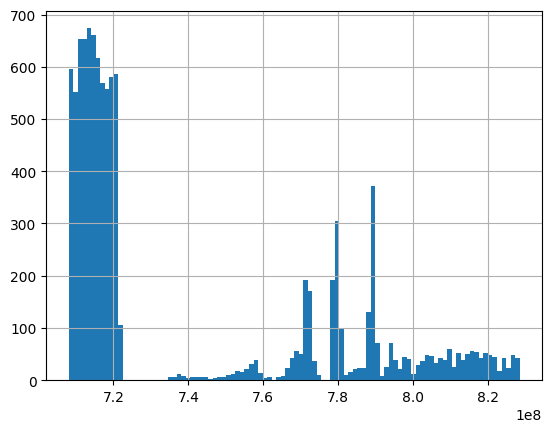

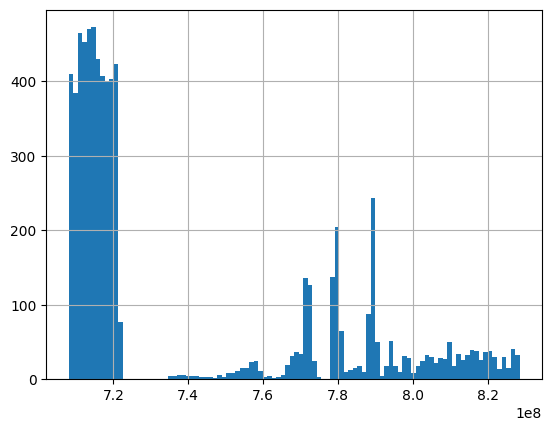

In [ ]:
data['CLIENTNUM'].hist(bins=100)      # check all data histogram of CLIENTNUM for overall distribution of client numbering
plt.show()
data.loc[data['Set']=='Train', 'CLIENTNUM'].hist(bins=100)      # check train histogram of CLIENTNUM for overall distribution of client numbering
plt.show()


#### NOTES:
- There is a clear division of customer IDs numbering into at least 2 distinct groups in train data:
  - 700,000,000 - 720,000,000 and
  - 730,000,000 - 820,000,000
- This division might be caused by
  - by a factor already present in our data, like old/new customers, existing/lapsed customers, by products types, their activity or usage level or
  -  by another factor not presented in our data  

  If former is true, we would leave this as is becuse other variable in data would represent splti in this variance

  if latter is true, we should inform & investigate this issue as it might bias our data and might make our models irrelevant to future



#### SUGGESTED STEPS:
- bucket customer based on their IDs into 2 groups
- try to predict these 2-group split by other variabes data

In [ ]:
# bucket customers based on their IDs into 2 groups from train data
data['CLIENTNUM_GROUP'] = np.where(data['CLIENTNUM'] >= 730000000, 'High_ID', 'Low_ID')
data['CLIENTNUM_GROUP'].value_counts()


,count
CLIENTNUM_GROUP,
Low_ID,6802
High_ID,3325


Attempt to predit 'CLIENTNUM_GROUP' should be done after ther rest of data is checked & conditioned

### DATA CONDITION DIAGNOZING

In [ ]:
data.info()
      # checking for unusual values in data
for column in data.columns[1:]:
    print('\n' + "-" * 50)
    print(data[column].value_counts())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### NOTES:
- There are no alternative values (other than in
 Income_Category) that potenially could be representing NaN or Missing
- Income_Category = 'abc' needs to be investigated
- Avg_Utilization_Ratio = 0.0 needs to be investigated
- Total_Trans_Amt outliers need to be investigated


### Additional checking of distributions

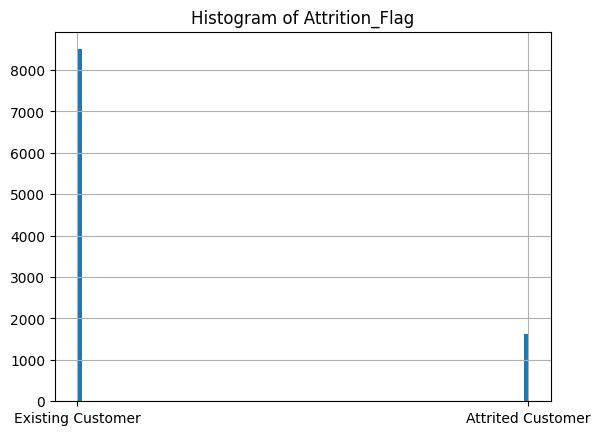

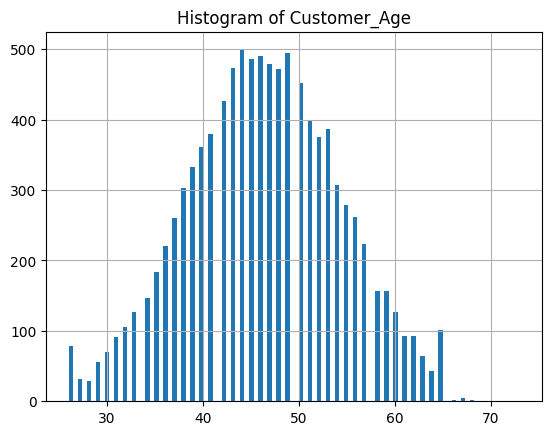

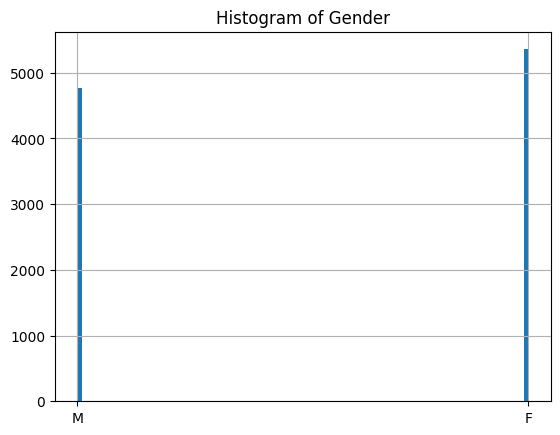

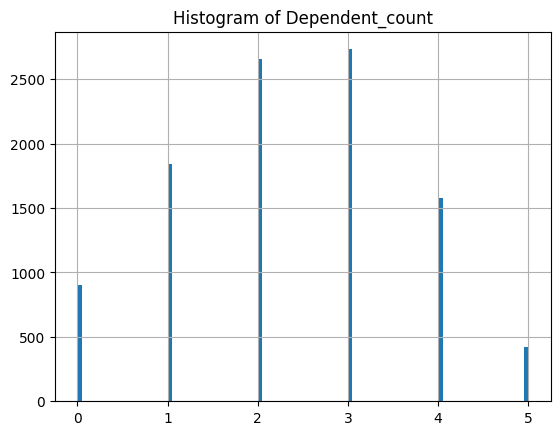

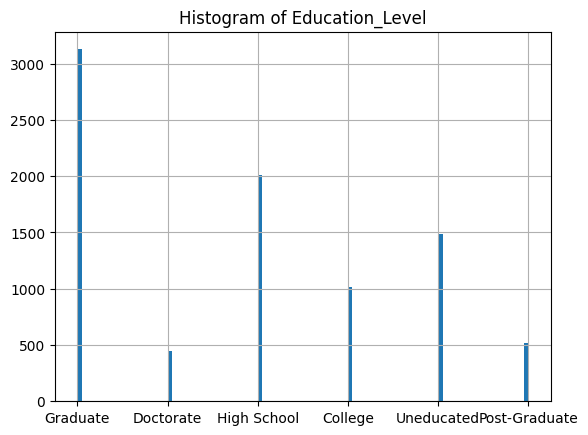

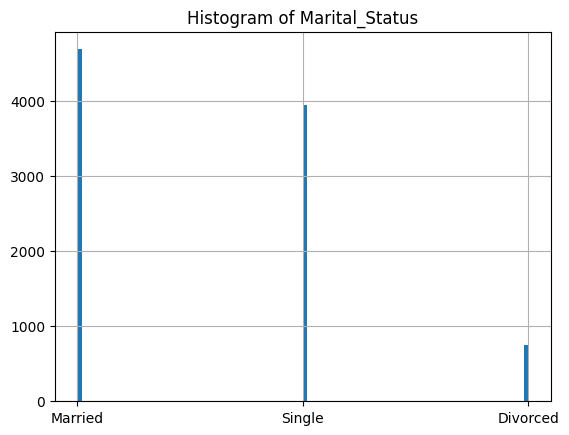

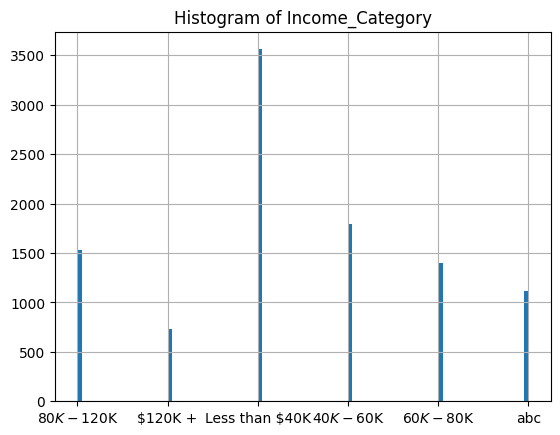

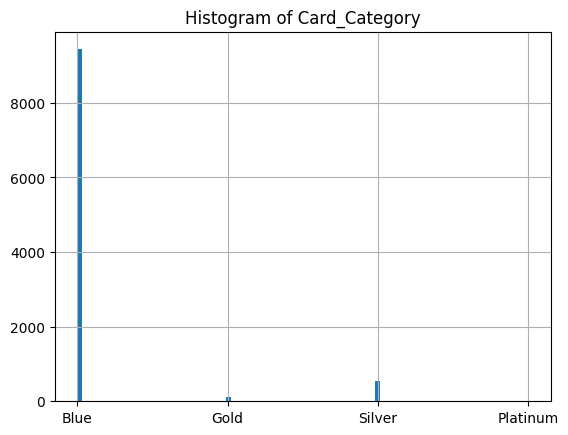

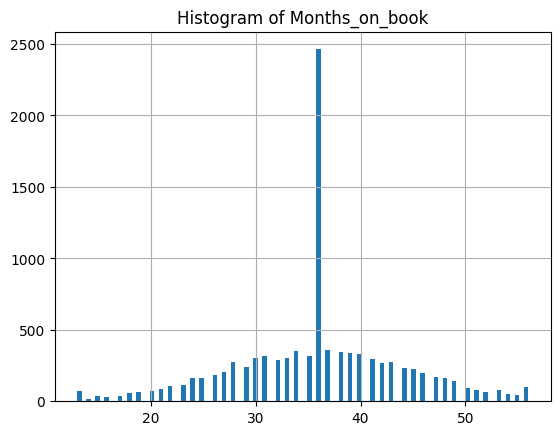

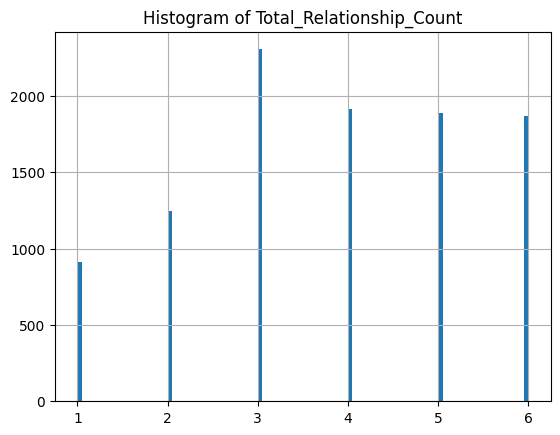

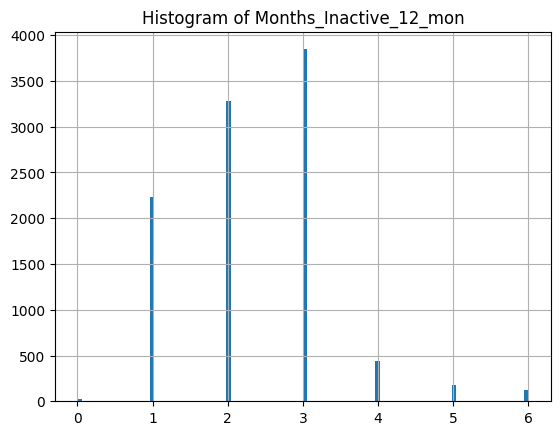

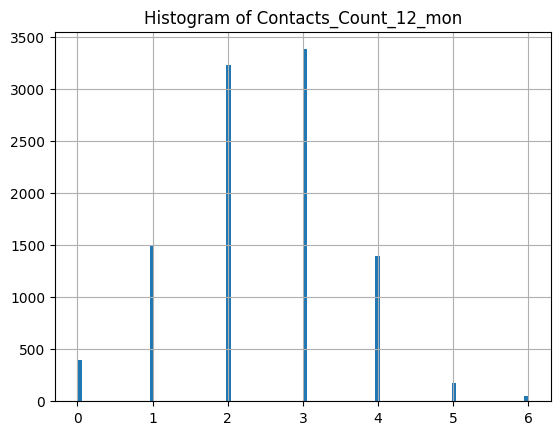

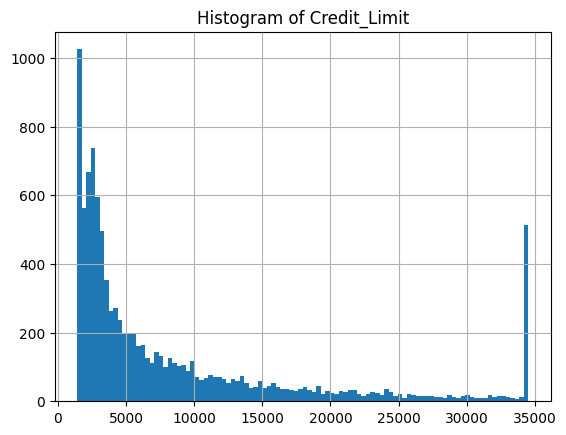

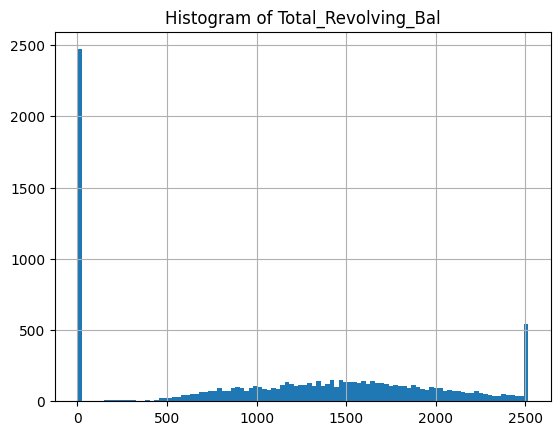

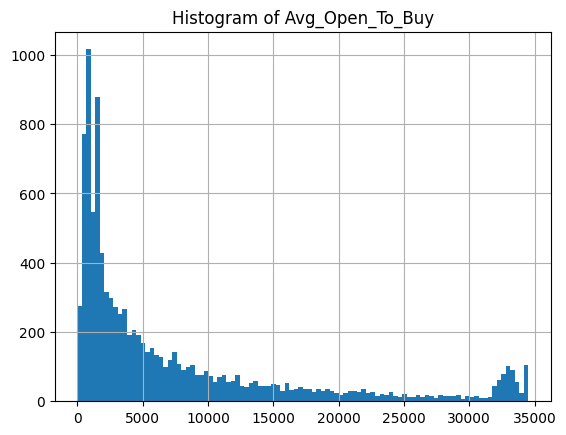

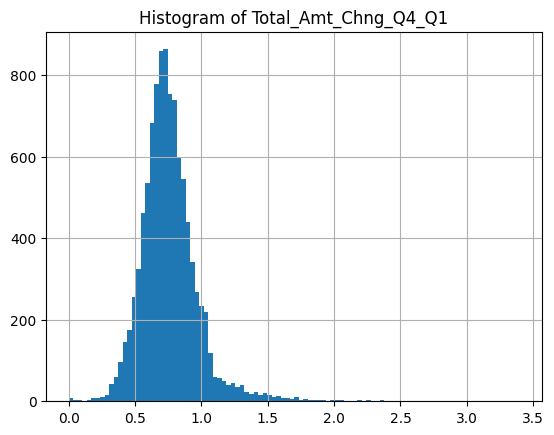

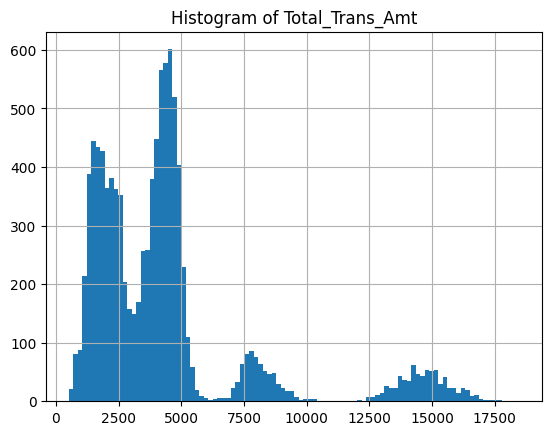

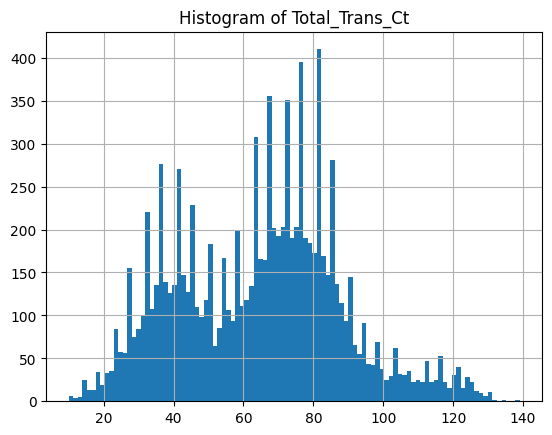

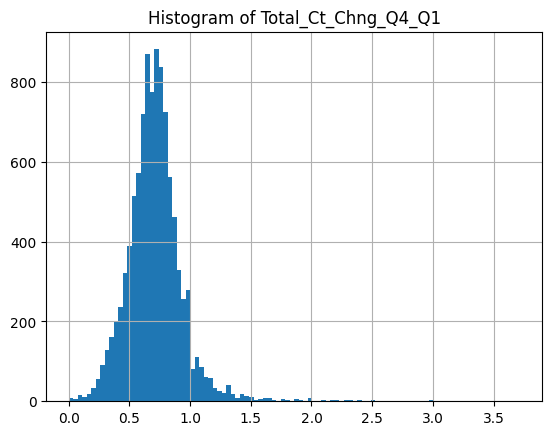

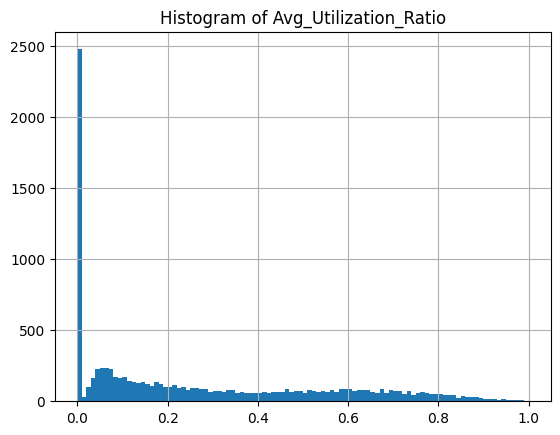

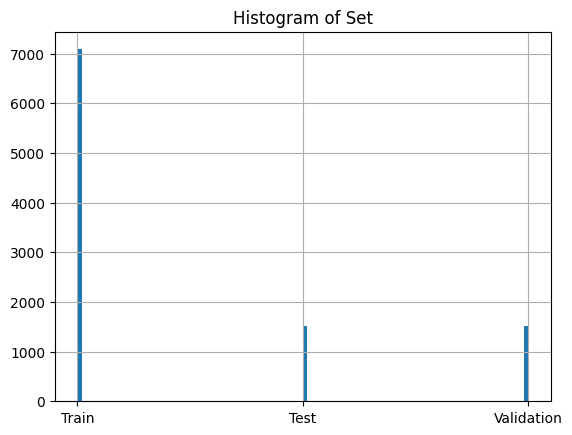

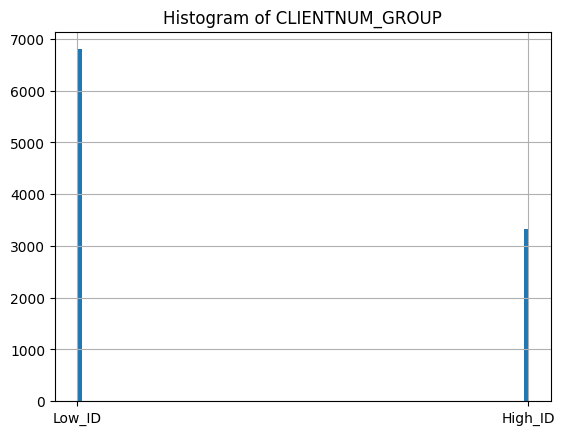

In [ ]:
for column in data.columns[1:]:
    plt.title(f'Histogram of {column}')
    data[column].hist(bins=100)
    plt.show()

### NOTES:
- **Months_on_book**: someone already recoded missing Months_on_book to median ->  distribution is weird; variance reduced. Variable might not be optimal for model generalizing
- **Total_Revolving_Bal**: Someone pobbily capped it to 2500 max. Might consider bucketing it
- **Avg_Open_To_Buy**: Seems to be similar to Credit_Limit in range and distribution
- **Total_Amt_Chng_Q4_Q1** and **Total_Ct_Chng_Q4_Q1**: majority below 1.0 indicating overall decline, which might be caused by:
  - seasonality
  - policy excluding some customers from this data and not properly accounting those could pump this ratio (new customers for instance)
  - a global decline trend (would be very concenring and is less likely)
- **Total_Trans_Amt**: Looks like a mix of 4 gaussians. Propose bucketing into 4 buckets.
- **Avg_Utilization_Ratio**: hugely skewed distribution, possibly can consider bucketing

- For all dollar variables we should consider relative referencing due to the fact that future ujnknown inflation level will render these dollar amounts-based rules inaccurate -> future model performance will be deteriorated. Possible reference points:
  - Credit limit
  - Income level


#### Lets convert ALL Object vars to Categorical vars first

In [ ]:
for column in data.columns: # Loop through all columns
    if data[column].dtype == 'object': # Only apply for columns with categorical strings
        data[column] = pd.Categorical(data[column]) # Replace strings
data.info()
data.head(10)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           8608 non-null   category
 6   Marital_Status            9378 non-null   category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Set,CLIENTNUM_GROUP
0,720303933,Existing Customer,40,M,2,Graduate,Married,$80K - $120K,Blue,36,...,3340.0,1282,2058.0,0.724,4526,82,0.547,0.384,Train,Low_ID
1,715971108,Existing Customer,51,M,4,Graduate,Single,$120K +,Blue,42,...,34516.0,1763,32753.0,1.266,1550,41,1.050,0.051,Test,Low_ID
2,711370458,Existing Customer,49,F,5,Graduate,Married,Less than $40K,Gold,38,...,15016.0,2016,13000.0,0.709,7685,84,0.527,0.134,Train,Low_ID
3,719267283,Existing Customer,35,F,2,Doctorate,Married,$40K - $60K,Blue,27,...,1953.0,1554,399.0,0.581,4598,71,0.651,0.796,Train,Low_ID
4,714321408,Existing Customer,65,M,1,High School,Married,$40K - $60K,Blue,56,...,2246.0,1326,920.0,0.543,1429,32,0.455,0.590,Train,Low_ID
5,794113758,Existing Customer,60,M,0,High School,Married,$60K - $80K,Blue,54,...,9592.0,1968,7624.0,0.610,1821,55,0.447,0.205,Train,High_ID
6,717664008,Attrited Customer,37,M,3,College,Married,$60K - $80K,Blue,19,...,3100.0,2517,583.0,0.350,694,12,0.200,0.812,Train,Low_ID
7,719694408,Attrited Customer,30,F,1,College,Single,Less than $40K,Blue,36,...,4541.0,0,4541.0,0.976,7996,80,0.778,0.000,Train,Low_ID
8,712783083,Attrited Customer,48,F,4,High School,Married,Less than $40K,Blue,37,...,3607.0,0,3607.0,0.504,2013,35,0.458,0.000,Train,Low_ID
9,710974308,Existing Customer,38,M,1,Graduate,NaN,$80K - $120K,Blue,36,...,26792.0,1671,25121.0,0.938,3587,66,0.571,0.062,Train,Low_ID


#### Encode Target Variable

In [ ]:
      # Encode the target variable
label_encoder = LabelEncoder()
data['Attrition_Flag'] = label_encoder.fit_transform(data['Attrition_Flag'])
      # Let rename target var
data = data.rename(columns={'Attrition_Flag': 'Retained'}) # Rename the column using the DataFrame rename function
data['Retained'].value_counts()

,count
Retained,
1,8500
0,1627


#### Lets Handle Mising Values

In [ ]:
      # lets take Income_Category = 'abc' as missing
data['Income_Category'] = data['Income_Category'].replace('abc', np.nan)
data['Income_Category'].value_counts()

,count
Income_Category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
$120K +,727


In [ ]:
      # lets make Marital_Status' = Missing as new "Unknown" category
data['Marital_Status'] = data['Marital_Status'].cat.add_categories('Unknown')
data['Marital_Status'] = data['Marital_Status'].fillna('Unknown')
data['Marital_Status'].value_counts()

,count
Marital_Status,
Married,4687
Single,3943
Unknown,749
Divorced,748


In [ ]:
      # Handle other missing values taking most frequently from each dset separately
categorical_imputer = SimpleImputer(strategy='most_frequent')
      # first for train portion
data.loc[data['Set'] == 'Train', 'Education_Level'] = categorical_imputer.fit_transform(data.loc[data['Set'] == 'Train', ['Education_Level']]).ravel()
data.loc[data['Set'] == 'Train', 'Income_Category'] = categorical_imputer.fit_transform(data.loc[data['Set'] == 'Train', ['Income_Category']]).ravel()
      # then for Validation portion
data.loc[data['Set'] == 'Validation', 'Education_Level'] = categorical_imputer.fit_transform(data.loc[data['Set'] == 'Validation', ['Education_Level']]).ravel()
data.loc[data['Set'] == 'Validation', 'Income_Category'] = categorical_imputer.fit_transform(data.loc[data['Set'] == 'Validation', ['Income_Category']]).ravel()
      # lastly for Test portion
data.loc[data['Set'] == 'Test', 'Education_Level'] = categorical_imputer.fit_transform(data.loc[data['Set'] == 'Test', ['Education_Level']]).ravel()
data.loc[data['Set'] == 'Test', 'Income_Category'] = categorical_imputer.fit_transform(data.loc[data['Set'] == 'Test', ['Income_Category']]).ravel()


data['Education_Level'] = pd.Categorical(data['Education_Level']) # Replace strings with an integer
data['Income_Category'] = pd.Categorical(data['Income_Category']) # Replace strings with an integer

data.info()

print("-" * 50)
data.head(20)
print("-" * 50)
print(data['Education_Level'].value_counts(), end='\n' + "-" * 50)
print(data['Income_Category'].value_counts(), end='\n' + "-" * 50)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Retained                  10127 non-null  int64   
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

#### Let change the order in Education from low to hig education

In [ ]:
    # Define an order of Education Levels
print(data['Education_Level'].dtype, end='\n')
education_mapping = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5
}

    # Apply the mapping to encode the Education_Level column
data['Education_Level_Rec'] = data['Education_Level'].map(education_mapping)
data['Education_Level_Rec'] = data['Education_Level_Rec'].astype(int)     # and convert to integer
data['Education_Level_Rec'].value_counts().sort_index()

category


,count
Education_Level_Rec,
0,1487
1,2013
2,1013
3,4647
4,516
5,451


#### Lets hot encode variables where applicable

In [ ]:
      # Dichotomize Gender
data['Gender'].value_counts()
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Retained                  10127 non-null  int64   
 2   Customer_Age              10127 non-null  int64   
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [ ]:
      # Dichotomize Marital_Status
print(data['Marital_Status'].value_counts(), end='\n')
data = pd.get_dummies(data, columns=['Marital_Status'], drop_first=False)  # see handling of drop below
data = data.drop(columns=['Marital_Status_Unknown']) # manually drop "Unknown" category / dunny
data.info()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Retained                  10127 non-null  int64   
 2   Customer_Age              10127 non-null  int64   
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Income_Category           10127 non-null  category
 6   Card_Category             10127 non-null  category
 7   Months_on_book            10127 non-null  int64   
 8   Total_Relationship_Count  10127 non-null  int64   
 9   Months_Inactive_12_mon    10127 non-null  int64   
 10  Contacts_Count_12_mon     10127 non-null  int64   
 11  Credit_Limit              10127 non-null  float64

In [ ]:
      # Dichotomize Card_Category
print(data['Card_Category'].value_counts(), end='\n')
data = pd.get_dummies(data, columns=['Card_Category'], drop_first=False)  # see handling of drop below
data = data.drop(columns=['Card_Category_Platinum']) # manually drop "Platinum" category / dunny
data.info()

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Retained                  10127 non-null  int64   
 2   Customer_Age              10127 non-null  int64   
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Income_Category           10127 non-null  category
 6   Months_on_book            10127 non-null  int64   
 7   Total_Relationship_Count  10127 non-null  int64   
 8   Months_Inactive_12_mon    10127 non-null  int64   
 9   Contacts_Count_12_mon     10127 non-null  int64   
 10  Credit_Limit              10127 non-null  float64 
 11  Total_Revolving_Bal       10127 non-null  int64   

In [ ]:
    # review  Income_Category
print(data['Income_Category'].dtype, end='\n')
print(data['Income_Category'].value_counts(), end='\n')
    # Define an order of Income Levels
desired_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

# Convert 'Income_Category' to an ordered categorical type with the specified order
data['Income_Category'] = pd.Categorical(data['Income_Category'], categories=desired_order, ordered=True)
print(data['Income_Category'].dtype, end='\n')
print(data['Income_Category'].value_counts().sort_index(), end='\n')
data['Income_Category_Rec'] = data['Income_Category'].cat.codes     # and convert to integer
print(data['Income_Category_Rec'].dtype, end='\n')
print(data['Income_Category_Rec'].value_counts().sort_index(), end='\n')

category
Income_Category
Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: count, dtype: int64
category
Income_Category
Less than $40K    4673
$40K - $60K       1790
$60K - $80K       1402
$80K - $120K      1535
$120K +            727
Name: count, dtype: int64
int8
Income_Category_Rec
0    4673
1    1790
2    1402
3    1535
4     727
Name: count, dtype: int64


In [ ]:
     # dichotyomize client group
print(data['CLIENTNUM_GROUP'].dtype, end='\n')
data = pd.get_dummies(data, columns=['CLIENTNUM_GROUP'], drop_first=True)
data['CLIENTNUM_GROUP_Low_ID'].value_counts()

category


,count
CLIENTNUM_GROUP_Low_ID,
True,6802
False,3325


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Retained                  10127 non-null  int64   
 2   Customer_Age              10127 non-null  int64   
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Income_Category           10127 non-null  category
 6   Months_on_book            10127 non-null  int64   
 7   Total_Relationship_Count  10127 non-null  int64   
 8   Months_Inactive_12_mon    10127 non-null  int64   
 9   Contacts_Count_12_mon     10127 non-null  int64   
 10  Credit_Limit              10127 non-null  float64 
 11  Total_Revolving_Bal       10127 non-null  int64   
 12  Avg_Open_To_Buy           10127 non-null  float64 
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  floa

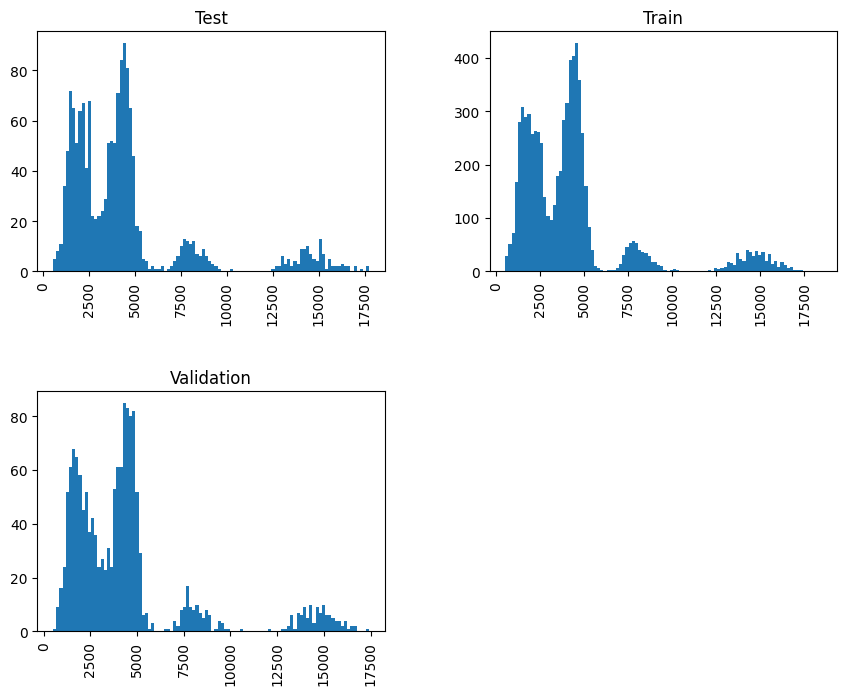

--------------------------------------------------
int64


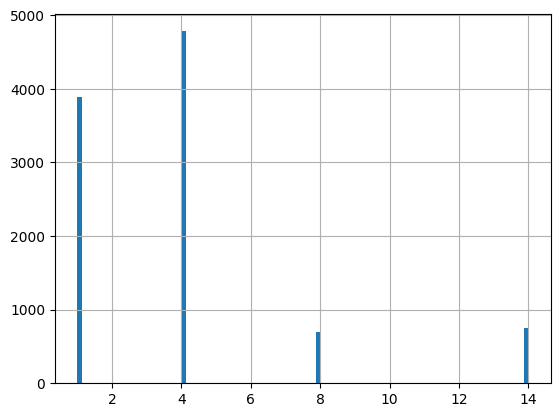

In [ ]:
      # Lets review Total_Trans_Amt again
data.info()
data['Set'].value_counts()
print(data['Total_Trans_Amt'].dtype, end='\n')
print(data['Total_Trans_Amt'].value_counts(), end='\n')
data['Total_Trans_Amt'].hist(bins=100,by=data['Set'], figsize=(10, 8))
plt.show()


bins = [0, 3000, 6000, 11000, np.inf]  # Define custom ranges for buckets based on 4 histogram curves from Train Data
labels = [1, 4, 8, 14]  # encode each range with an integer closest to the median of each peack

# Apply the custom buckets to the 'Total_Trans_Amt' column
data['Total_Trans_Amt_Nets'] = pd.cut(data['Total_Trans_Amt'], bins=bins, labels=labels, right=False)
data['Total_Trans_Amt_Nets'] = data['Total_Trans_Amt_Nets'].astype(int)     # and convert to integer

# Checking the distribution of the newly created custom bucket column
print('-'*50)
print(data['Total_Trans_Amt_Nets'].dtype, end='\n')
data['Total_Trans_Amt_Nets'].hist(bins=100)
plt.show()

In [ ]:
      # convert Credit_Limit to integer
data['Credit_Limit'] = data['Credit_Limit'].astype(int)
print(data['Credit_Limit'].dtype, end='\n')
print(data['Credit_Limit'].value_counts(), end='\n')

      # convert Avg_Open_To_Buy to integer
data['Avg_Open_To_Buy'] = data['Avg_Open_To_Buy'].astype(int)
print(data['Avg_Open_To_Buy'].dtype, end='\n')
print(data['Avg_Open_To_Buy'].value_counts(), end='\n')

int64
Credit_Limit
34516    508
1438     507
9959      18
15987     18
23981     12
        ... 
7350       1
2716       1
16583      1
4325       1
3221       1
Name: count, Length: 6205, dtype: int64
int64
Avg_Open_To_Buy
1438     326
34516     98
31999     26
701        8
713        8
        ... 
3956       1
14170      1
4456       1
4152       1
3221       1
Name: count, Length: 6670, dtype: int64


In [ ]:
      # cope recoded data for further reduction
data_rec=data.copy()
      # delete redundant columns
data_rec = data_rec.drop(columns=['CLIENTNUM', 'Education_Level', 'Income_Category'])
data_rec.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Retained                  10127 non-null  int64   
 1   Customer_Age              10127 non-null  int64   
 2   Dependent_count           10127 non-null  int64   
 3   Months_on_book            10127 non-null  int64   
 4   Total_Relationship_Count  10127 non-null  int64   
 5   Months_Inactive_12_mon    10127 non-null  int64   
 6   Contacts_Count_12_mon     10127 non-null  int64   
 7   Credit_Limit              10127 non-null  int64   
 8   Total_Revolving_Bal       10127 non-null  int64   
 9   Avg_Open_To_Buy           10127 non-null  int64   
 10  Total_Amt_Chng_Q4_Q1      10127 non-null  float64 
 11  Total_Trans_Amt           10127 non-null  int64   
 12  Total_Trans_Ct            10127 non-null  int64   
 13  Total_Ct_Chng_Q4_Q1       10127 non-null  floa

## Exploratory Data Analysis (EDA)

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
      # lets review relations to Retained on small random portion of train data
sampled_data = data_rec[data_rec['Set'] == 'Train'].sample(n=1000, random_state=1)

numeric_columns = sampled_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
  # Exclude non-relevant columns
exclude_cols = [
    'CLIENTNUM_GROUP_Low_ID', 'Set', 'Education_Level_Rec',
    'Income_Category_Rec', 'Attrition_Flag', 'Retained',
    'Gender_M', 'Marital_Status_Divorced', 'Marital_Status_Married',
    'Marital_Status_Single', 'Card_Category_Blue',
    'Card_Category_Gold', 'Card_Category_Silver'
]

pairplot_columns = [col for col in numeric_columns if col not in exclude_cols]

sampled_data['Retained'] = sampled_data['Retained'].astype('category')

print("Selected Columns for Pairplot:")
print(pairplot_columns)



sns.pairplot(
    sampled_data,
    vars=pairplot_columns,
    hue='Retained',
    palette='coolwarm',
    diag_kind='kde',
    markers=["o", "s"],
    plot_kws={'alpha': 0.5}
)

plt.suptitle('Pairplot of Selected Features Colored by Retained Status', y=1.02)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### NOTES:
- Customer_Age,
Dependent_count,
Credit_Limit,
Avg_Utilization_Ratio,
Month_on_book,
Credit_limit,
Avg_open_to_Buy
seem to have NO relation to Retain - nether alone nor interlocked with other var


In [ ]:
      # Lets Delete Customer_Age, Dependent_count, Credit_Limit, Avg_Utilization_Ratio, Months_on_book, Credit_Limit, Avg_Open_To_Buy
data_rec_cln=data_rec.copy()

data_rec_cln = data_rec_cln.drop(columns=['Dependent_count', 'Credit_Limit', 'Months_on_book', 'Credit_Limit', 'Avg_Open_To_Buy'])
data_rec_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Retained                  10127 non-null  int64   
 1   Customer_Age              10127 non-null  int64   
 2   Total_Relationship_Count  10127 non-null  int64   
 3   Months_Inactive_12_mon    10127 non-null  int64   
 4   Contacts_Count_12_mon     10127 non-null  int64   
 5   Total_Revolving_Bal       10127 non-null  int64   
 6   Total_Amt_Chng_Q4_Q1      10127 non-null  float64 
 7   Total_Trans_Amt           10127 non-null  int64   
 8   Total_Trans_Ct            10127 non-null  int64   
 9   Total_Ct_Chng_Q4_Q1       10127 non-null  float64 
 10  Avg_Utilization_Ratio     10127 non-null  float64 
 11  Set                       10127 non-null  category
 12  Education_Level_Rec       10127 non-null  int64   
 13  Gender_M                  10127 non-null  bool

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

Plotting for variable: Retained


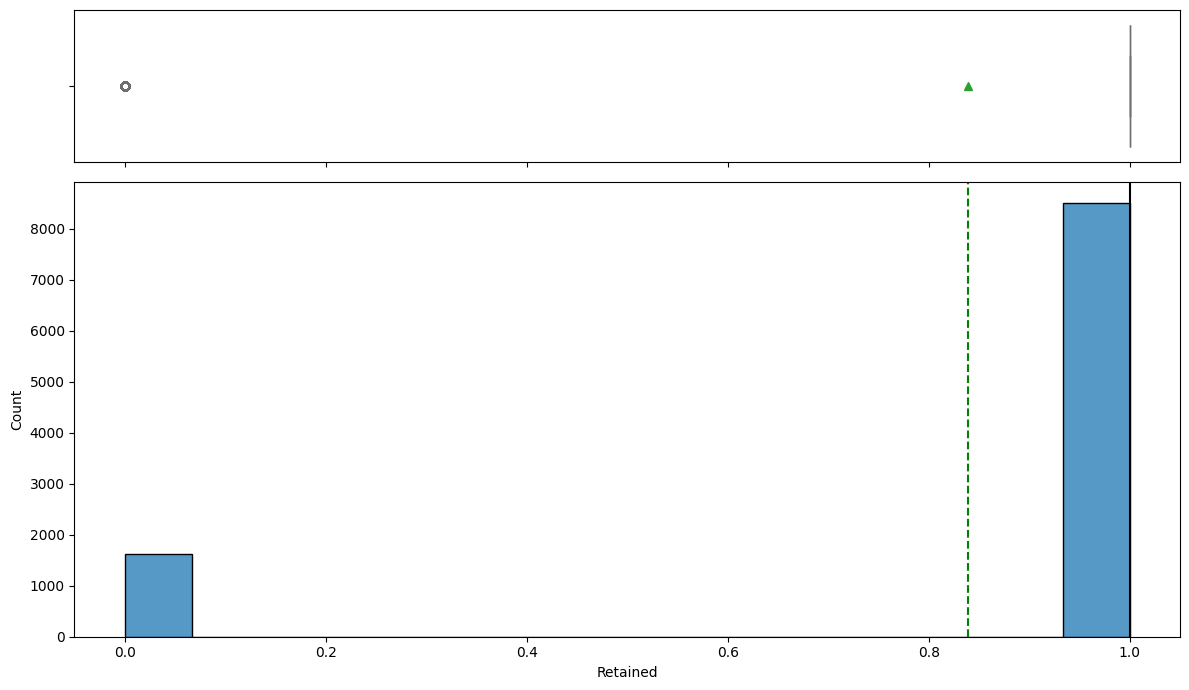

Plotting for variable: Customer_Age


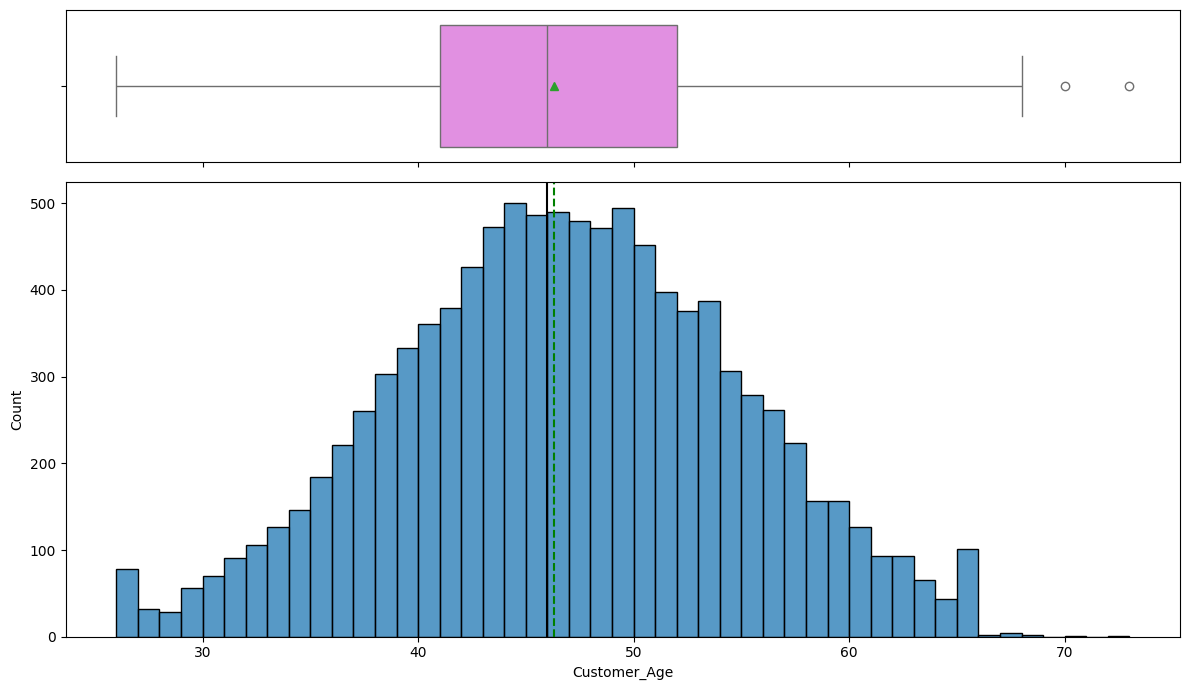

Plotting for variable: Dependent_count


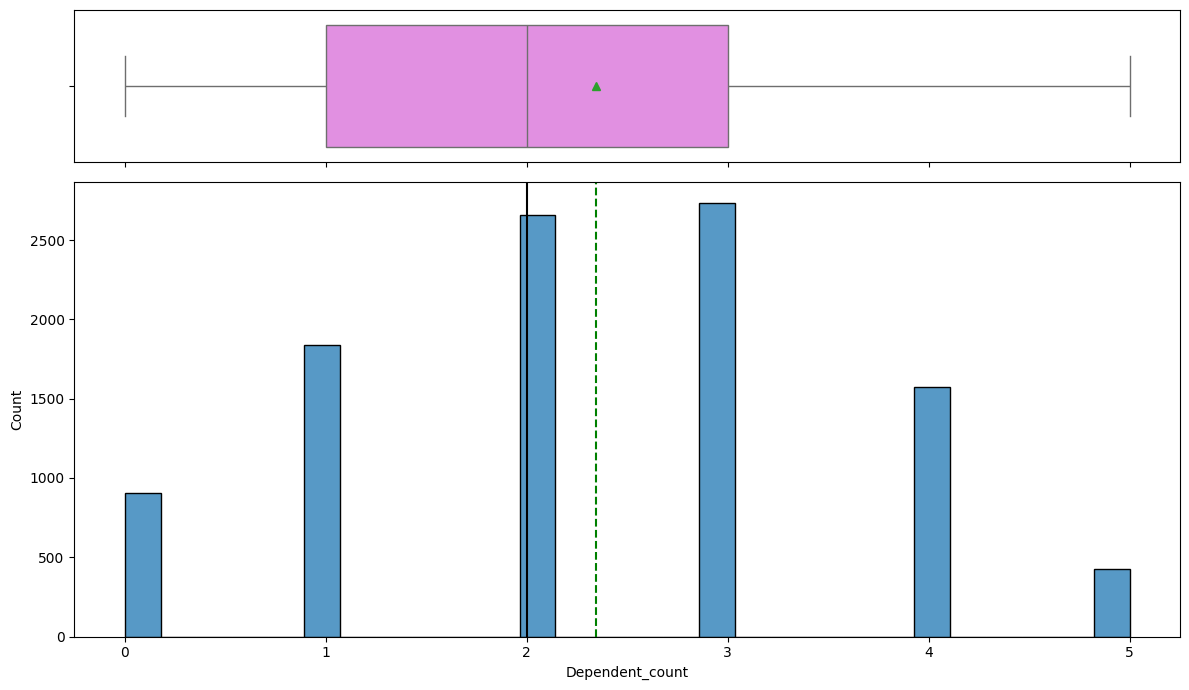

Plotting for variable: Months_on_book


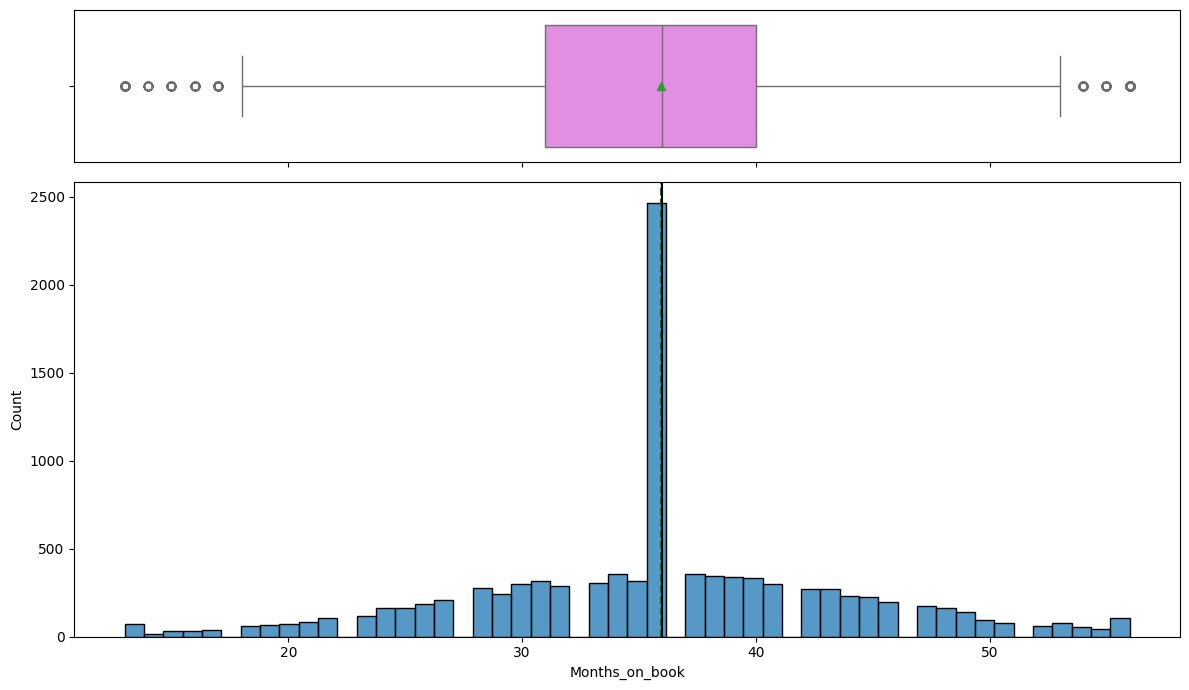

Plotting for variable: Total_Relationship_Count


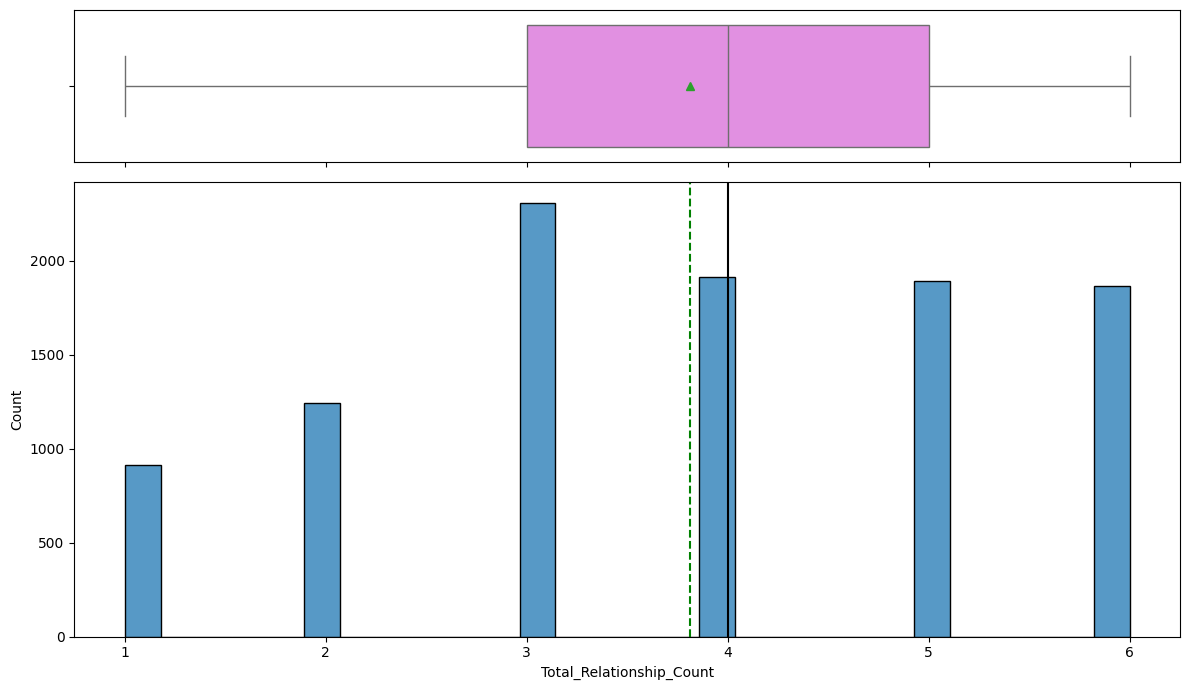

Plotting for variable: Months_Inactive_12_mon


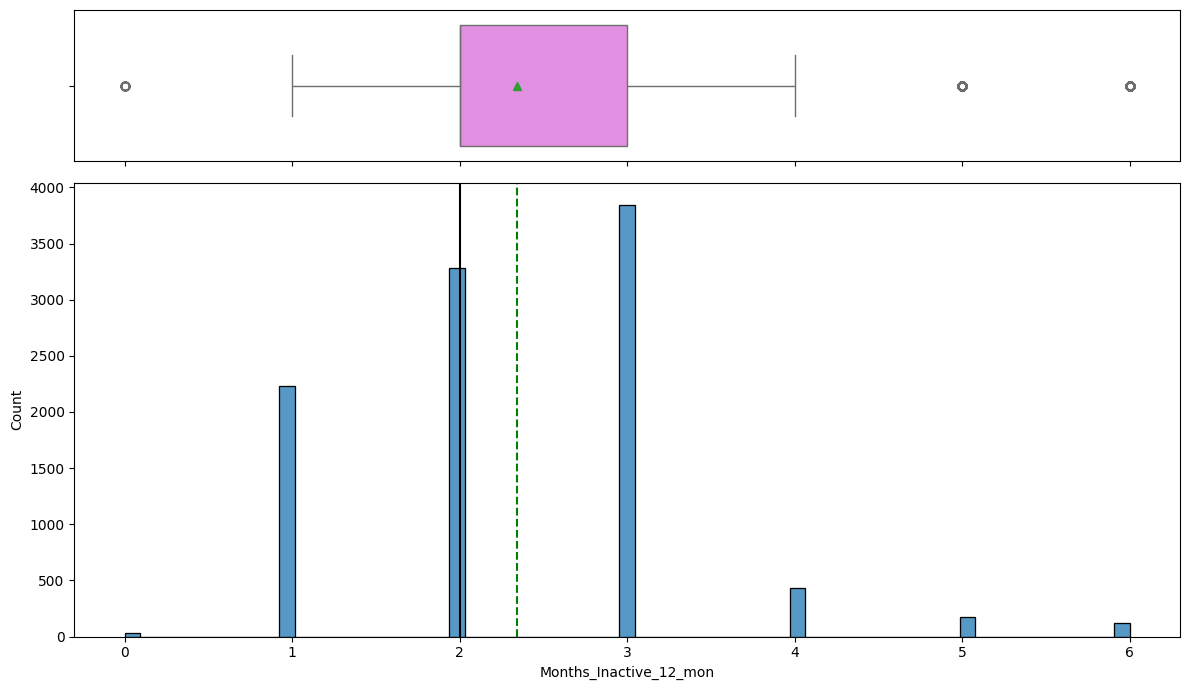

Plotting for variable: Contacts_Count_12_mon


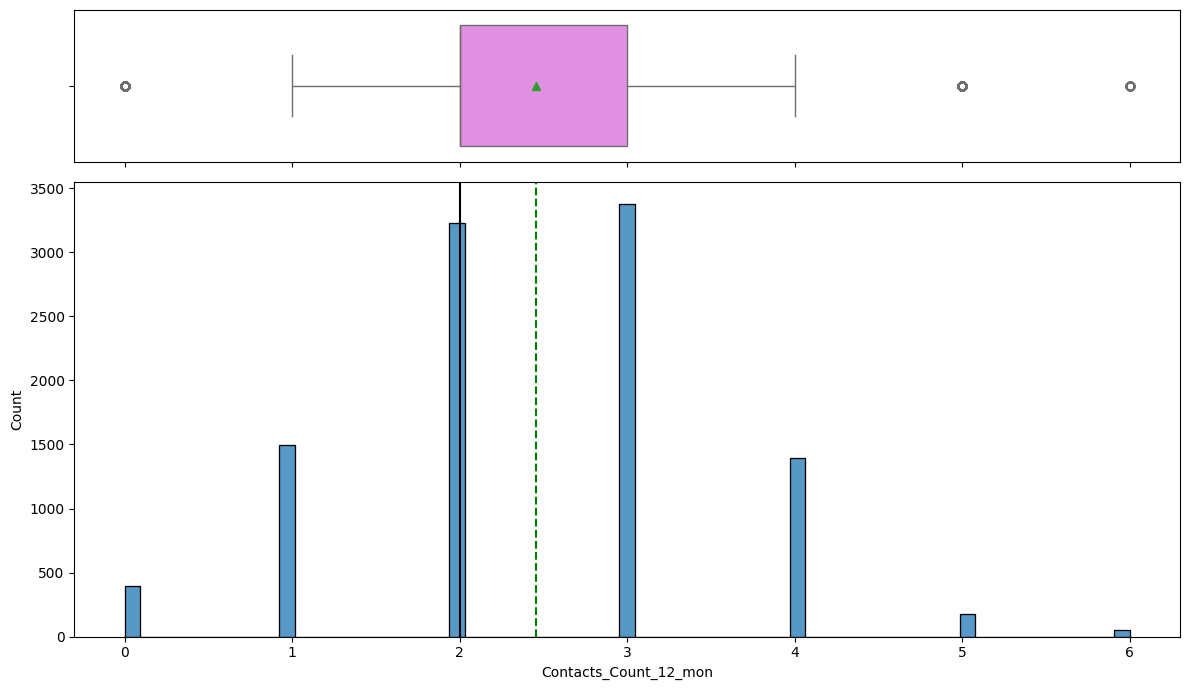

Plotting for variable: Credit_Limit


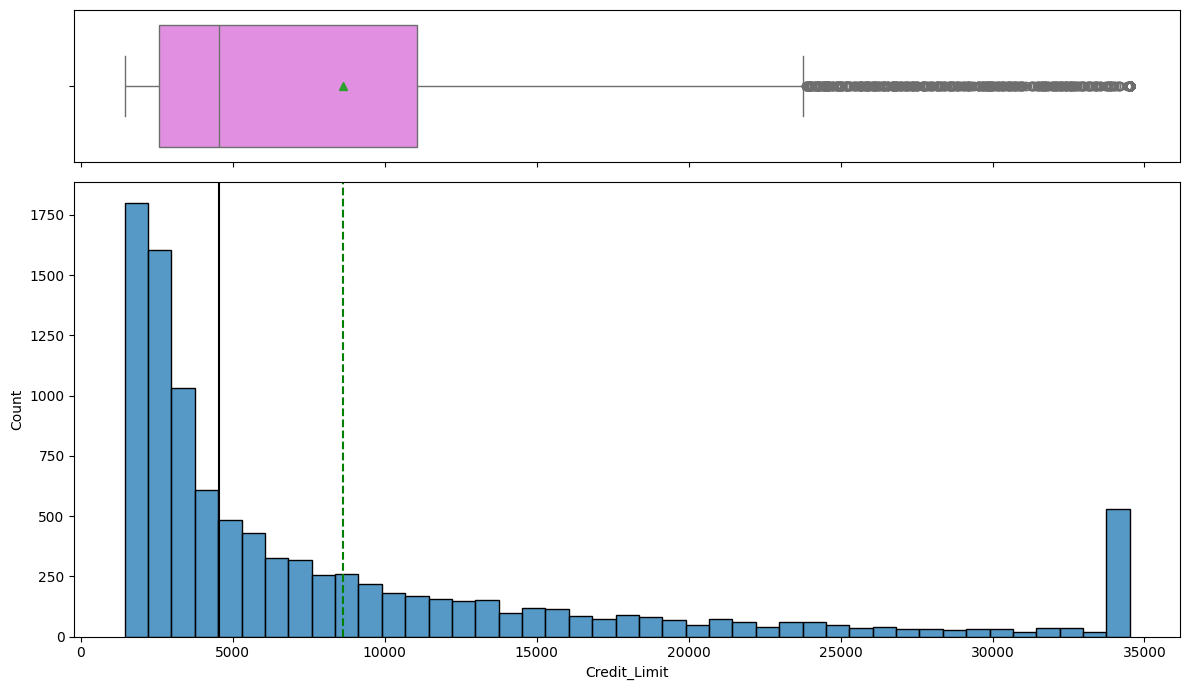

Plotting for variable: Total_Revolving_Bal


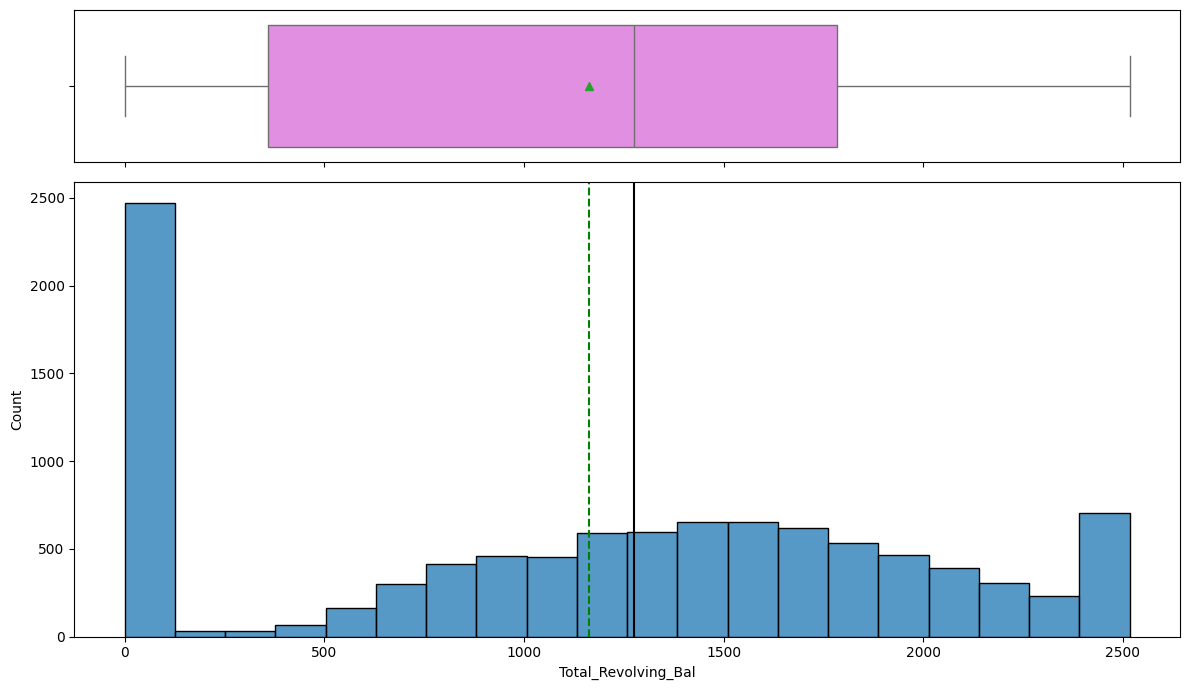

Plotting for variable: Avg_Open_To_Buy


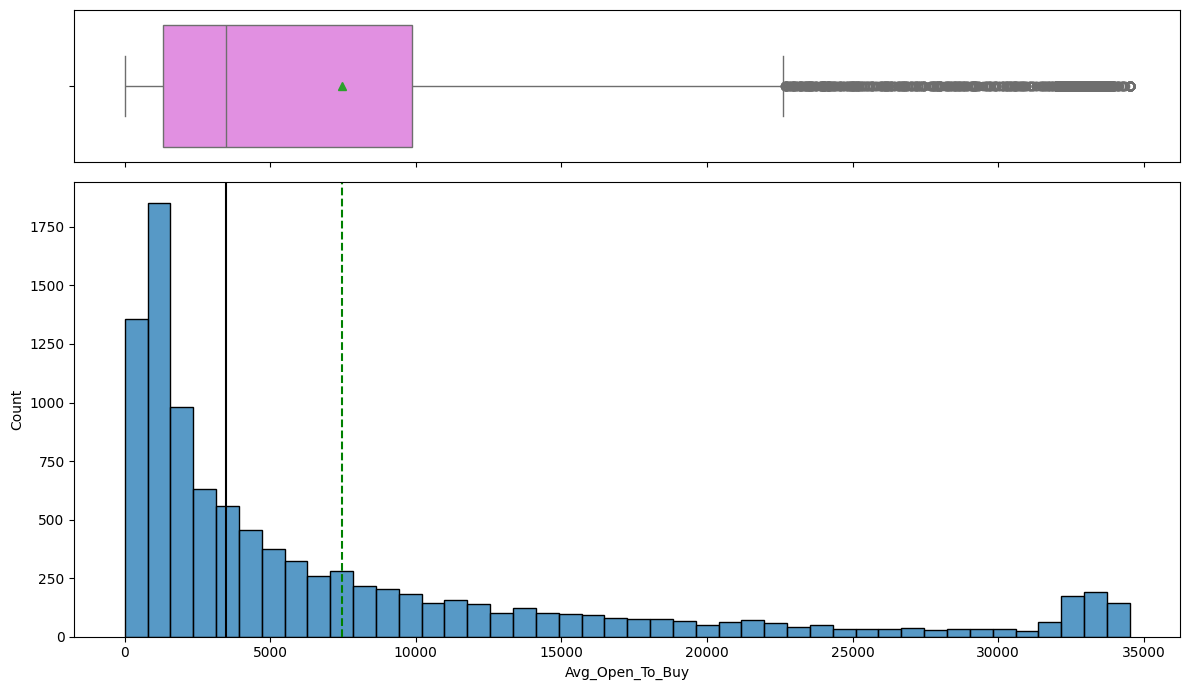

Plotting for variable: Total_Amt_Chng_Q4_Q1


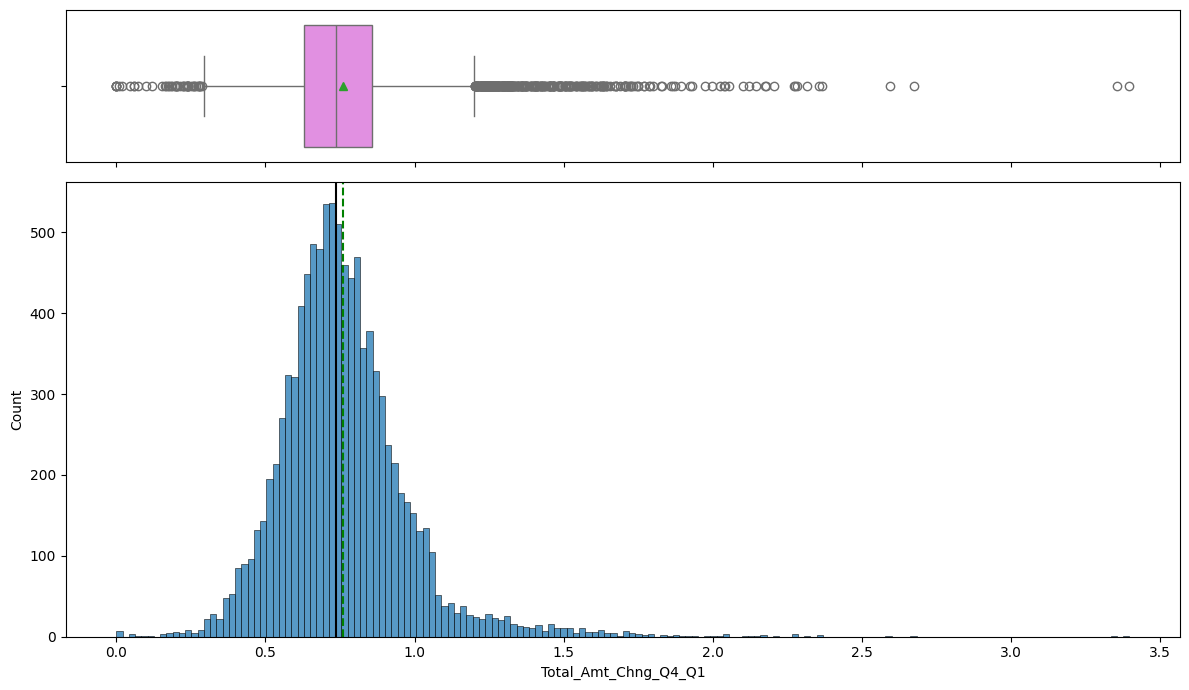

Plotting for variable: Total_Trans_Amt


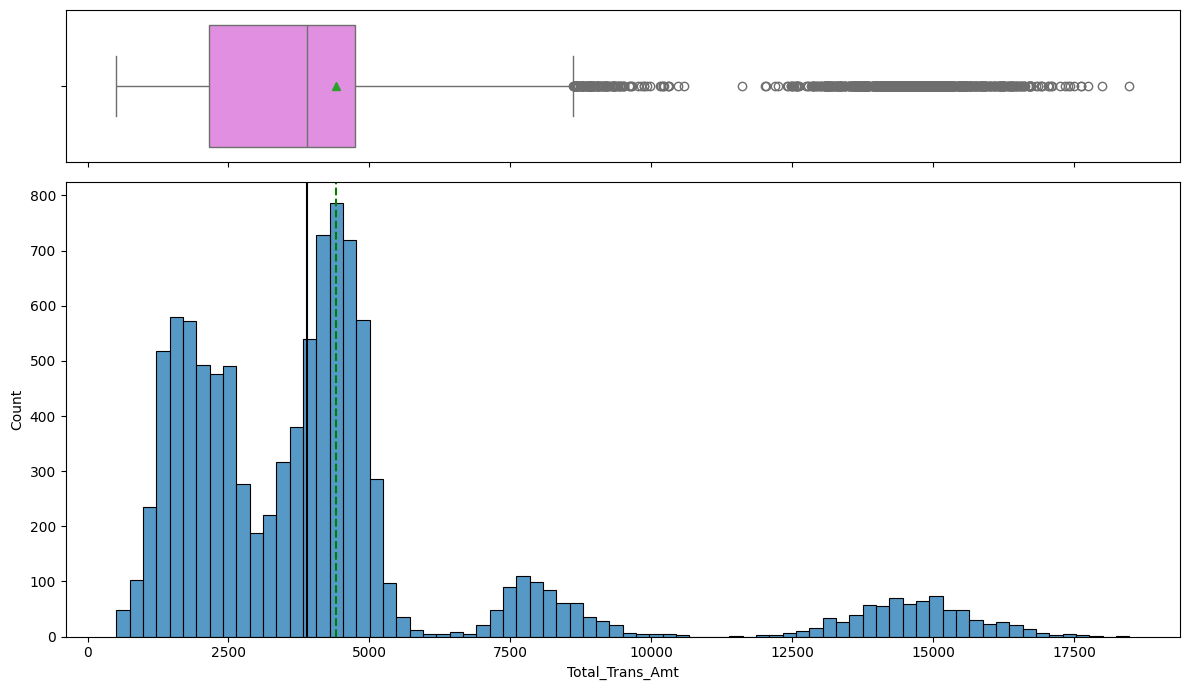

Plotting for variable: Total_Trans_Ct


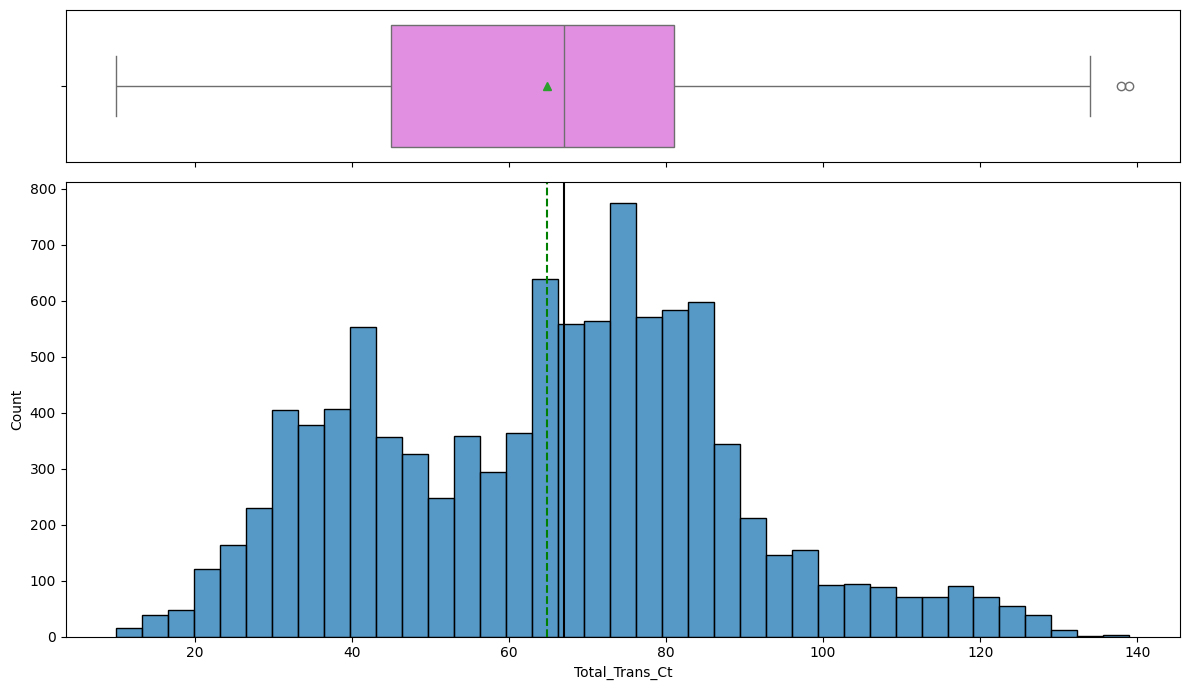

Plotting for variable: Total_Ct_Chng_Q4_Q1


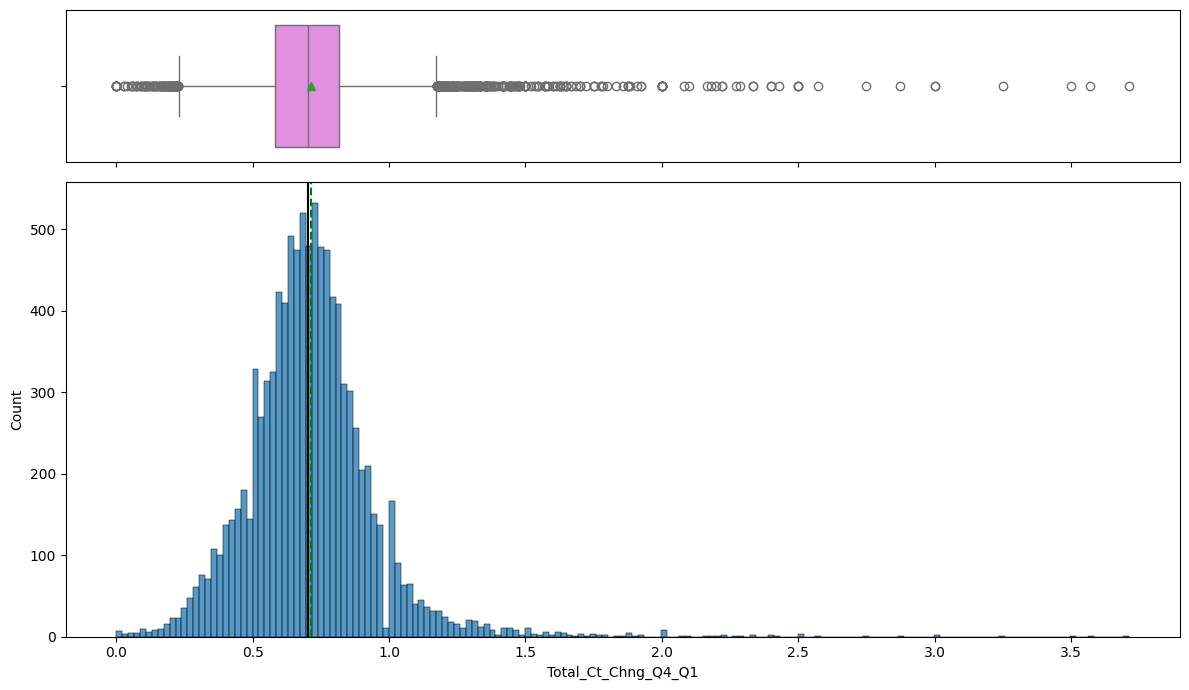

Plotting for variable: Avg_Utilization_Ratio


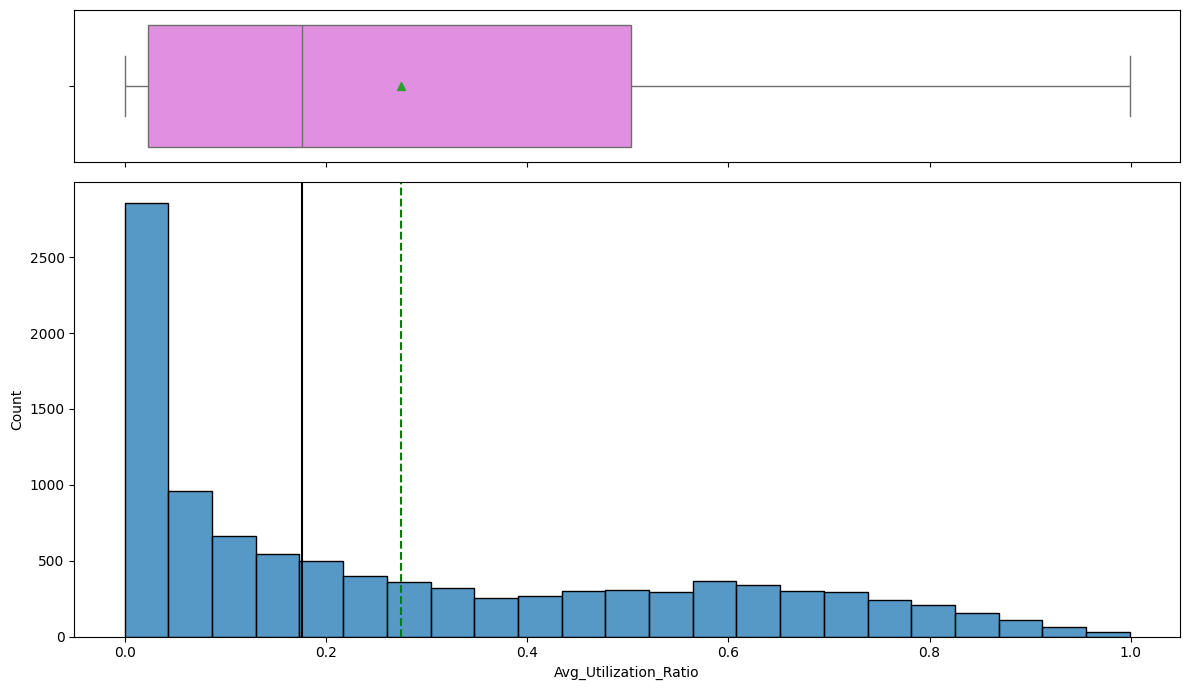

Plotting for variable: Education_Level_Rec


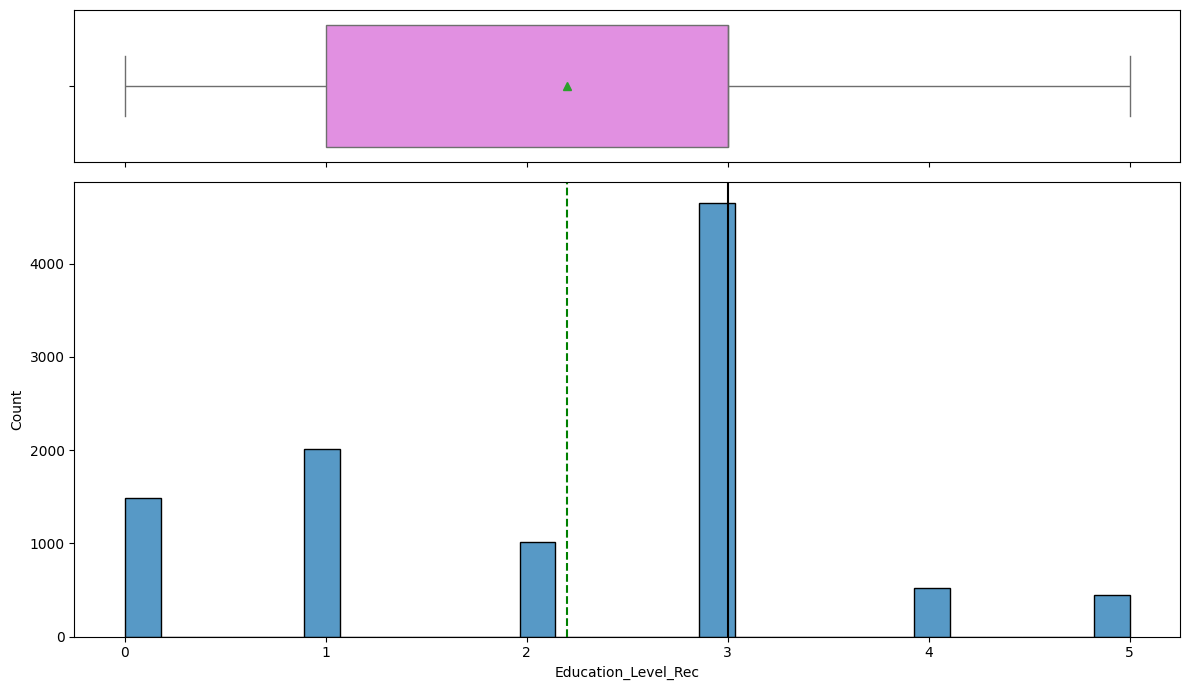

Plotting for variable: Income_Category_Rec


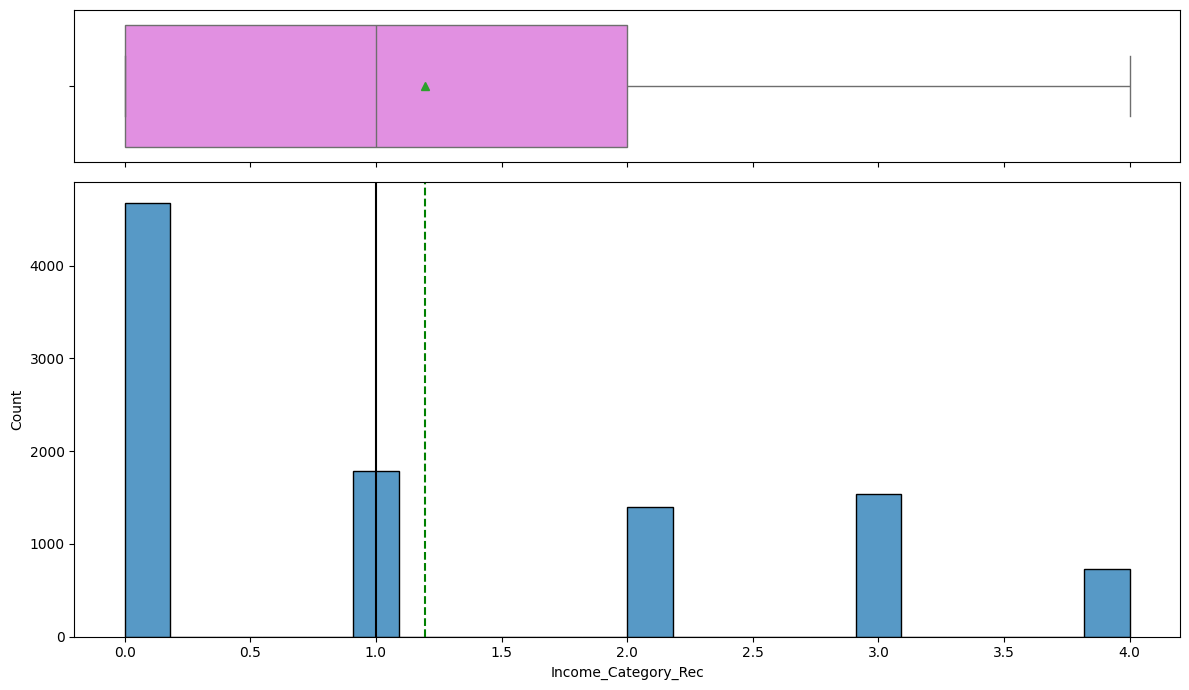

Plotting for variable: Total_Trans_Amt_Nets


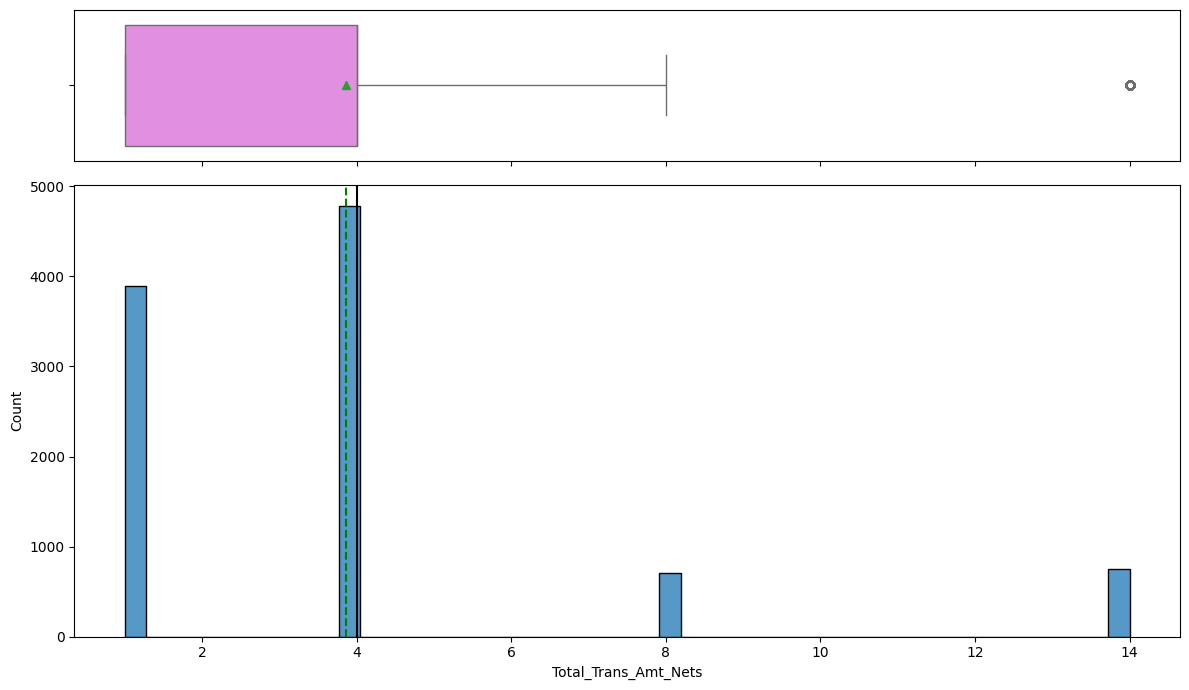

In [ ]:
      # take only numeric vars in train data
numeric_columns = data_rec[data_rec['Set'] == 'Train'].select_dtypes(include=['float64', 'int64', 'int8']).columns.tolist()
      # plot them all
for column in numeric_columns:
    print(f"Plotting for variable: {column}")
    histogram_boxplot(data=data_rec, feature=column)
    plt.tight_layout()
    plt.show()

#### NOTES:
- Age outliers detected: they are real values and should be kept as-is
- Months_on_book outliers detected: Previosly recoded to missing-to-median data (see a huge spike on median) is unsuitable to detect outlier via IQR, stdev etc.  Keep as-is
- Credit_Limit / Avg_Open_To_Buy outliers detected: extremely skewed distribution with real values. Keep as-is
- Total_Amt_Chng_Q4_Q1 outliers detected: Treat!
- Total_Trans_Amt outliers detected: has already been recoded into discrete 4-bin numerical. Ignore this var!
- Total_Trans_Ct outliers detected: Real values, Keep as-is
- Total_Ct_Chng_Q4_Q1 outliers detected: Treat!




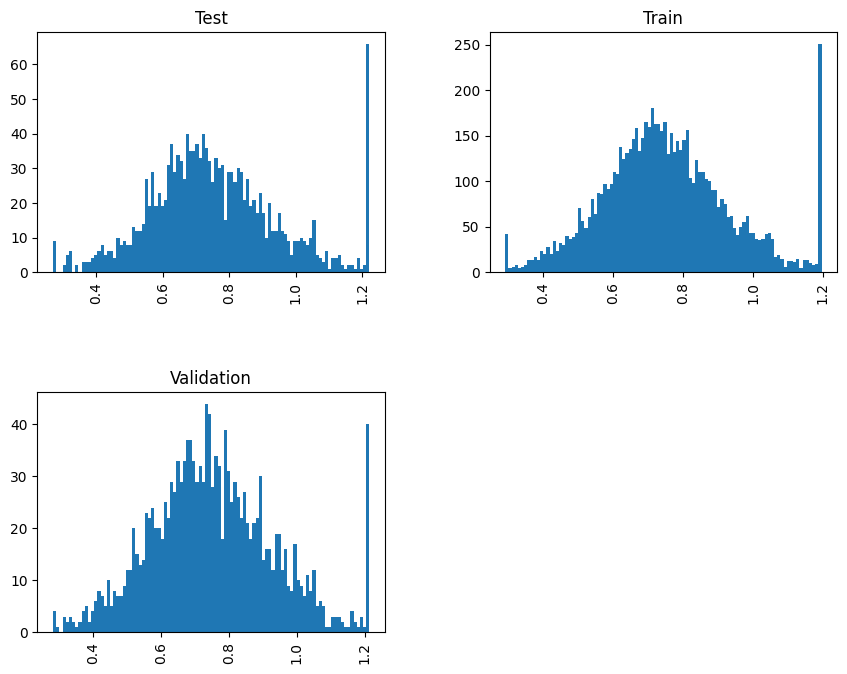

In [ ]:
# cap outliers in Total_Amt_Chng_Q4_Q1 using IQR for train set

Q1 = data_rec.loc[data_rec['Set'] == 'Train', 'Total_Amt_Chng_Q4_Q1'].quantile(0.25)
Q3 = data_rec.loc[data_rec['Set'] == 'Train', 'Total_Amt_Chng_Q4_Q1'].quantile(0.75)
lower_bound = Q1 - 1.5 * (Q3 - Q1)
upper_bound = Q3 + 1.5 * (Q3 - Q1)
data_rec.loc[data_rec['Set'] == 'Train', 'Total_Amt_Chng_Q4_Q1'] = data_rec.loc[data_rec['Set'] == 'Train', 'Total_Amt_Chng_Q4_Q1'].clip(lower=lower_bound, upper=upper_bound)

# cap outliers in Total_Amt_Chng_Q4_Q1 using IQR for validation set

Q1 = data_rec.loc[data_rec['Set'] == 'Validation', 'Total_Amt_Chng_Q4_Q1'].quantile(0.25)
Q3 = data_rec.loc[data_rec['Set'] == 'Validation', 'Total_Amt_Chng_Q4_Q1'].quantile(0.75)
lower_bound = Q1 - 1.5 * (Q3 - Q1)
upper_bound = Q3 + 1.5 * (Q3 - Q1)
data_rec.loc[data_rec['Set'] == 'Validation', 'Total_Amt_Chng_Q4_Q1'] = data_rec.loc[data_rec['Set'] == 'Validation', 'Total_Amt_Chng_Q4_Q1'].clip(lower=lower_bound, upper=upper_bound)

# cap outliers in Total_Amt_Chng_Q4_Q1 using IQR for test set

Q1 = data_rec.loc[data_rec['Set'] == 'Test', 'Total_Amt_Chng_Q4_Q1'].quantile(0.25)
Q3 = data_rec.loc[data_rec['Set'] == 'Test', 'Total_Amt_Chng_Q4_Q1'].quantile(0.75)
lower_bound = Q1 - 1.5 * (Q3 - Q1)
upper_bound = Q3 + 1.5 * (Q3 - Q1)
data_rec.loc[data_rec['Set'] == 'Test', 'Total_Amt_Chng_Q4_Q1'] = data_rec.loc[data_rec['Set'] == 'Test', 'Total_Amt_Chng_Q4_Q1'].clip(lower=lower_bound, upper=upper_bound)



data_rec['Total_Amt_Chng_Q4_Q1'].hist(bins=100,by=data_rec['Set'], figsize=(10, 8))
plt.show()


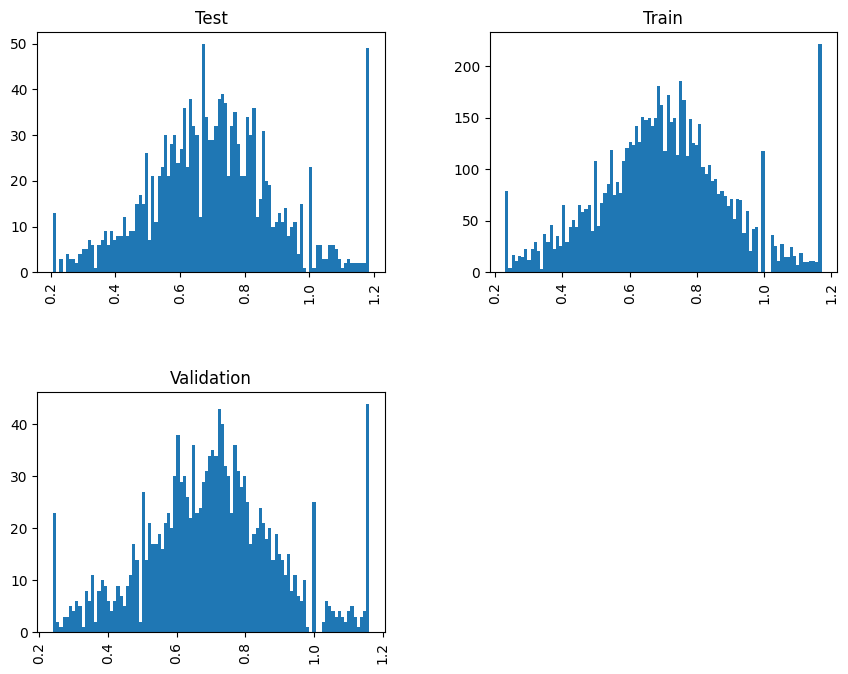

In [ ]:
# cap outliers in Total_Ct_Chng_Q4_Q1 using IQR for train set

Q1 = data_rec.loc[data_rec['Set'] == 'Train', 'Total_Ct_Chng_Q4_Q1'].quantile(0.25)
Q3 = data_rec.loc[data_rec['Set'] == 'Train', 'Total_Ct_Chng_Q4_Q1'].quantile(0.75)
lower_bound = Q1 - 1.5 * (Q3 - Q1)
upper_bound = Q3 + 1.5 * (Q3 - Q1)
data_rec.loc[data_rec['Set'] == 'Train', 'Total_Ct_Chng_Q4_Q1'] = data_rec.loc[data_rec['Set'] == 'Train', 'Total_Ct_Chng_Q4_Q1'].clip(lower=lower_bound, upper=upper_bound)

# cap outliers in Total_Ct_Chng_Q4_Q1 using IQR for validation set

Q1 = data_rec.loc[data_rec['Set'] == 'Validation', 'Total_Ct_Chng_Q4_Q1'].quantile(0.25)
Q3 = data_rec.loc[data_rec['Set'] == 'Validation', 'Total_Ct_Chng_Q4_Q1'].quantile(0.75)
lower_bound = Q1 - 1.5 * (Q3 - Q1)
upper_bound = Q3 + 1.5 * (Q3 - Q1)
data_rec.loc[data_rec['Set'] == 'Validation', 'Total_Ct_Chng_Q4_Q1'] = data_rec.loc[data_rec['Set'] == 'Validation', 'Total_Ct_Chng_Q4_Q1'].clip(lower=lower_bound, upper=upper_bound)

# cap outliers in Total_Ct_Chng_Q4_Q1 using IQR for test set

Q1 = data_rec.loc[data_rec['Set'] == 'Test', 'Total_Ct_Chng_Q4_Q1'].quantile(0.25)
Q3 = data_rec.loc[data_rec['Set'] == 'Test', 'Total_Ct_Chng_Q4_Q1'].quantile(0.75)
lower_bound = Q1 - 1.5 * (Q3 - Q1)
upper_bound = Q3 + 1.5 * (Q3 - Q1)
data_rec.loc[data_rec['Set'] == 'Test', 'Total_Ct_Chng_Q4_Q1'] = data_rec.loc[data_rec['Set'] == 'Test', 'Total_Ct_Chng_Q4_Q1'].clip(lower=lower_bound, upper=upper_bound)



data_rec['Total_Ct_Chng_Q4_Q1'].hist(bins=100,by=data['Set'], figsize=(10, 8))
plt.show()

In [ ]:
data_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Retained                  10127 non-null  int64   
 1   Customer_Age              10127 non-null  int64   
 2   Dependent_count           10127 non-null  int64   
 3   Months_on_book            10127 non-null  int64   
 4   Total_Relationship_Count  10127 non-null  int64   
 5   Months_Inactive_12_mon    10127 non-null  int64   
 6   Contacts_Count_12_mon     10127 non-null  int64   
 7   Credit_Limit              10127 non-null  int64   
 8   Total_Revolving_Bal       10127 non-null  int64   
 9   Avg_Open_To_Buy           10127 non-null  int64   
 10  Total_Amt_Chng_Q4_Q1      10127 non-null  float64 
 11  Total_Trans_Amt           10127 non-null  int64   
 12  Total_Trans_Ct            10127 non-null  int64   
 13  Total_Ct_Chng_Q4_Q1       10127 non-null  floa

### Lets split and separate recoded and cleaned data according orignal split saved in 'Set' variable

In [ ]:
      # X Features: All columns except 'Retained' and 'Set'
X = data_rec_cln.drop(['Retained', 'Set'], axis=1)

      # Target: 'Retained' column
y = 1- data_rec_cln['Retained']

# Training Set
X_train = X[data_rec_cln['Set'] == 'Train']
y_train = y[data_rec_cln['Set'] == 'Train']

# Validation Set
X_val = X[data_rec_cln['Set'] == 'Validation']
y_val = y[data_rec_cln['Set'] == 'Validation']

# Test Set
X_test = X[data_rec_cln['Set'] == 'Test']
y_test = y[data_rec_cln['Set'] == 'Test']

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

Sample code for model building with original data

In [ ]:
models = []  # Empty list to store the models

models_0 = []  # Empty list to store the models
# Appending models into the list
models_0.append(("Bagging", BaggingClassifier(random_state=1)))
models_0.append(("Random forest", RandomForestClassifier(random_state=1)))
models_0.append(("Adaptive Boosting", AdaBoostClassifier(random_state=1)))
models_0.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models_0.append(("Extreme Gradient Boosting", XGBClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models_0:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models_0:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9762949956101844
Random forest: 1.0
Adaptive Boosting: 0.8542581211589113
Gradient Boosting: 0.8867427568042142
Extreme Gradient Boosting: 1.0

Validation Performance:

Bagging: 0.7950819672131147
Random forest: 0.8483606557377049
Adaptive Boosting: 0.8729508196721312
Gradient Boosting: 0.860655737704918
Extreme Gradient Boosting: 0.8770491803278688


### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
models_1 = []  # Empty list to store the models
# Appending models into the list
models_1.append(("Bagging_up", BaggingClassifier(random_state=1)))
models_1.append(("Random forest_up", RandomForestClassifier(random_state=1)))
models_1.append(("Adaptive Boosting_up", AdaBoostClassifier(random_state=1)))
models_1.append(("Gradient Boosting_up", GradientBoostingClassifier(random_state=1)))
models_1.append(("Extreme Gradient Boosting_up", XGBClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models_1:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models_1:
    model.fit(X_train_over, y_train_over)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging_up: 0.9988233316523786
Random forest_up: 1.0
Adaptive Boosting_up: 0.9662128088754413
Gradient Boosting_up: 0.9818456883509834
Extreme Gradient Boosting_up: 1.0

Validation Performance:

Bagging_up: 0.8647540983606558
Random forest_up: 0.8934426229508197
Adaptive Boosting_up: 0.9057377049180327
Gradient Boosting_up: 0.9098360655737705
Extreme Gradient Boosting_up: 0.9221311475409836


### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
models_2 = []  # Empty list to store the models
# Appending models into the list
models_2.append(("Bagging_un", BaggingClassifier(random_state=1)))
models_2.append(("Random forest_un", RandomForestClassifier(random_state=1)))
models_2.append(("Adaptive Boosting_un", AdaBoostClassifier(random_state=1)))
models_2.append(("Gradient Boosting_un", GradientBoostingClassifier(random_state=1)))
models_2.append(("Extreme Gradient Boosting_un", XGBClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models_2:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models_2:
    model.fit(X_train_un, y_train_un)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging_un: 0.9964881474978051
Random forest_un: 1.0
Adaptive Boosting_un: 0.9569798068481123
Gradient Boosting_un: 0.9841966637401229
Extreme Gradient Boosting_un: 1.0

Validation Performance:

Bagging_un: 0.930327868852459
Random forest_un: 0.9426229508196722
Adaptive Boosting_un: 0.9508196721311475
Gradient Boosting_un: 0.9385245901639344
Extreme Gradient Boosting_un: 0.9385245901639344


#### NOTES:
- out of 15 models, "Adaptive Boosting_un" delivered the highest Validation Scores (95.1%) and lowest drop from Train to Validation scores (-0.6%)
- The next 2 top-performing models were "Random forest_un" with (94.1%) and (-5.7%) respecitvely
AND "Gradient Boosting_un" with (93.9%) and (-4.6%) respecitvely

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. The parameter grids have been set to do necessary hyperparameter tuning. These grids are expected to provide a balance between model performance improvement and execution time. We can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

In [ ]:
      # Let Tune the Best Model Adpative Boosting undersampled
ab_un = AdaBoostClassifier(random_state=1)

      # Grid of parameters to choose from
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

      # Type of scoring used to compare parameter combinations
acc_scorer = mtr.make_scorer(mtr.recall_score)
      # Run the grid search
grid_obj = GridSearchCV(ab_un, param_grid, scoring=acc_scorer, cv=5, n_jobs= -1, verbose = 2)
grid_obj = grid_obj.fit(X_train_un, y_train_un)
# Print the best combination of parameters
grid_obj.best_params_


Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1),
 'learning_rate': 0.1,
 'n_estimators': 100}

In [ ]:
      # Let's check the best CV score, for the obtained parameters
grid_obj.best_score_

0.9499304428472062

In [ ]:
      # Lets Tune Radnom Forest undersampled
rf_un = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Run the random search
grid_obj2 = RandomizedSearchCV(rf_un, param_grid, n_iter=50, scoring=acc_scorer, cv=5, n_jobs= -1, verbose = 2)

grid_obj2 = grid_obj2.fit(X_train_un, y_train_un)

# Print the best combination of parameters
grid_obj2.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'n_estimators': 50,
 'min_samples_leaf': 2,
 'max_samples': 0.6,
 'max_features': 'sqrt'}

In [ ]:
      # Let's check the best CV score, for the obtained parameters
grid_obj2.best_score_

0.9569711724244533

In [ ]:
      # Lets Tune Gradient Boosting undersampled
gb_un = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Run the random search
grid_obj3 = RandomizedSearchCV(gb_un, param_grid, n_iter=50, scoring=acc_scorer, cv=5, n_jobs= -1, verbose = 2)

grid_obj3 = grid_obj3.fit(X_train_un, y_train_un)

# Print the best combination of parameters
grid_obj3.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'subsample': 0.7,
 'n_estimators': 50,
 'max_features': 0.5,
 'learning_rate': 0.01,
 'init': AdaBoostClassifier(random_state=1)}

In [ ]:
      # Let's check the best CV score, for the obtained parameters
grid_obj3.best_score_

0.9543357291908183

## Model Comparison and Final Model Selection

In [ ]:
ab_un_best = AdaBoostClassifier(
    random_state=1,
    base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1),
    learning_rate= 0.1,
    n_estimators= 100,
)
    # Fit the best algorithm to the data.
ab_un_best.fit(X_train_un, y_train_un)

rf_un_best = RandomForestClassifier(
    random_state=1,
    n_estimators= 50,
    min_samples_leaf= 2,
    max_samples= 0.6,
    max_features= 'sqrt',
)
    # Fit the best algorithm to the data.
rf_un_best.fit(X_train_un, y_train_un)


gb_un_best = GradientBoostingClassifier(
    random_state=1,
    subsample= 0.7,
    n_estimators= 50,
    max_features= 0.5,
    learning_rate= 0.01,
    init= AdaBoostClassifier(random_state=1),
)
    # Fit the best algorithm to the data.
gb_un_best.fit(X_train_un, y_train_un)


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.5,
                           n_estimators=50, random_state=1, subsample=0.7)

#### Let's check the model's performance




### Test set final performance

In [ ]:
      # BEST Adaptive Boosting Undersampled
      # Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train_un, ab_un_best.predict(X_train_un)))
print(recall_score(y_val, ab_un_best.predict(X_val)))
print("")
print("Precision on train and validation set")
      # Checking precision score on train and validation set
print(precision_score(y_train_un, ab_un_best.predict(X_train_un)))
print(precision_score(y_val, ab_un_best.predict(X_val)))
print("")
print("Accuracy on train and validation set")
      # Checking accuracy score on train and validation set
print(accuracy_score(y_train_un, ab_un_best.predict(X_train_un)))
print(accuracy_score(y_val, ab_un_best.predict(X_val)))


print("")
print("")
      # BEST Random Forest Undersampled
      # Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train_un, rf_un_best.predict(X_train_un)))
print(recall_score(y_val, rf_un_best.predict(X_val)))
print("")
print("Precision on train and validation set")
      # Checking precision score on train and validation set
print(precision_score(y_train_un, rf_un_best.predict(X_train_un)))
print(precision_score(y_val, rf_un_best.predict(X_val)))
print("")
print("Accuracy on train and validation set")
      # Checking accuracy score on train and validation set
print(accuracy_score(y_train_un, rf_un_best.predict(X_train_un)))
print(accuracy_score(y_val, rf_un_best.predict(X_val)))


print("")
print("")
      # BEST Gradient Boostng Undesampled
      # Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train_un, gb_un_best.predict(X_train_un)))
print(recall_score(y_val, gb_un_best.predict(X_val)))
print("")
print("Precision on train and validation set")
      # Checking precision score on train and validation set
print(precision_score(y_train_un, gb_un_best.predict(X_train_un)))
print(precision_score(y_val, gb_un_best.predict(X_val)))
print("")
print("Accuracy on train and validation set")
      # Checking accuracy score on train and validation set
print(accuracy_score(y_train_un, gb_un_best.predict(X_train_un)))
print(accuracy_score(y_val, gb_un_best.predict(X_val)))

Recall on train and validation set
0.9956101843722563
0.9467213114754098

Precision on train and validation set
0.9869451697127938
0.7623762376237624

Accuracy on train and validation set
0.9912203687445127
0.9440421329822252


Recall on train and validation set
0.9938542581211589
0.9426229508196722

Precision on train and validation set
0.9758620689655172
0.6824925816023739

Accuracy on train and validation set
0.9846356453028973
0.9203423304805793


Recall on train and validation set
0.9604916593503073
0.9549180327868853

Precision on train and validation set
0.9101497504159733
0.6131578947368421

Accuracy on train and validation set
0.9328358208955224
0.8959842001316656


### NOTES:
- Based on Performance on Validation Data, Adaptive Boosting Undersampled deliver the best recall (95.5%) and lowest drop from train (-0.6%)
- While it is not the best out of 3 on Precision and overal Accuracy, Recall is the most important measure in the business context (False Attriction will lead to slight overspend on Retaining but False Non-Attriction will lead to loss of business)

In [ ]:
      # Final Test On TEST data

      print(recall_score(y_test, ab_un_best.predict(X_test)), end=' (Test Recall)\n')
      print(precision_score(y_test, ab_un_best.predict(X_test)), end=' (Test Precision)\n')
      print(accuracy_score(y_test, ab_un_best.predict(X_test)), end=' (Test Accuracy)\n')

0.9221311475409836 (Test Recall)
0.7839721254355401 (Test Precision)
0.9467105263157894 (Test Accuracy)


# Business Insights and Conclusions

#### Business Prioritization:

Recall is prioritized over precision. False Negatives (failing to identify a customer who will be retained) are less detrimental than False Positives (allocating resources to retain a customer who would have stayed regardless).

Based on the performance metrics, the Adaptive Boosting (AB) Undersampled model emerges as the most suitable for the business context due to its superior recall rates, which align with the priority of accurately identifying retained customers.

### **Adaptive Boosting (AB) Undersampled**

#### **Recall**:

Train: 99.56%
Validation: 94.67%
Test: 92.21%
The AB model maintains high recall across all datasets, ensuring that the majority of customers who are likely to stay are correctly identified.

#### **Precision**:

Train: 98.69%
Validation: 76.24%
Test: 78.40%
While precision is not the highest among the models, it remains within an acceptable range, balancing the need to avoid overspending on retention without missing out on retaining actual customers.

#### **Accuracy**:

Train: 99.12%
Validation: 94.40%
Test: 94.67%
The model exhibits robust accuracy, indicating reliable overall performance.




### Business Recommendations
Deploy the Adaptive Boosting (AB) Undersampled Model:

#### **Objective**:
Accurately identify customers who are likely to be retained.

#### **Action***:
Implement the AB model in the customer relationship management (CRM) system to flag customers for targeted retention campaigns.


#### **Expected Outcome**:
Enhanced retention rates by focusing resources on customers who are most likely to remain loyal, reducing churn.
Strategic Retention Campaigns:

#### **Targeting**:
Utilize the AB model predictions to design personalized retention strategies for identified customers.

#### **Resource Allocation**: Allocate marketing and customer service resources efficiently, focusing on high-recall predictions to maximize retention efforts' effectiveness.
Monitor and Validate Model Performance:

#### **Continuous Evaluation**:
Regularly assess the AB model's performance on new data to ensure it maintains high recall and acceptable precision.

#### **Feedback Loop**:
Incorporate feedback from retention campaigns to refine the model and improve prediction accuracy over time.

#### **Visual Analytics**:
Utilize dashboards and visualizations to track retention metrics and model effectiveness over time.





***